# **NOTE!!! This was my initial attempt at the doing the tasks. I however, ended up generating data differently and I explained why in the discussion.**

## I have submitted this notebook to support what i have written in the discussion section of my report, about the issues with using this methodology.

______________
______________

# Sound identification

In this mini project you will try and identify various types of sounds. This project can be considered as part image classifciation and part sequence modelling.

![Some of the images in spectrogram format](esc50.gif)



There are 2000 different sounds available covering 50 different categories. The different targets (labels), named categories and the number of sounds in each category are listed below.

|Target | Category | Count |
|---------|---------|-------|
| 0 | airplane | 40 |
| 1 | breathing | 40 |
| 2 | brushing_teeth | 40 |
| 3 | can_opening | 40 |
| 4 | car_horn | 40 |
| 5 | cat | 40 |
| 6 | chainsaw | 40 |
| 7 | chirping_birds | 40 |
| 8 | church_bells | 40 |
| 9 | clapping | 40 |
| 10 | clock_alarm | 40 |
| 11 | clock_tick | 40 |
| 12 | coughing | 40 |
| 13 | cow | 40 |
| 14 | crackling_fire | 40 |
| 15 | crickets | 40 |
| 16 | crow | 40 |
| 17 | crying_baby | 40 |
| 18 | dog | 40 |
| 19 | door_wood_creaks | 40 |
| 20 | door_wood_knock | 40 |
| 21 | drinking_sipping | 40 |
| 22 | engine | 40 |
| 23 | fireworks | 40 |
| 24 | footsteps | 40 |
| 25 | frog | 40 |
| 26 | glass_breaking | 40 |
| 27 | hand_saw | 40 |
| 28 | helicopter | 40 |
| 29 | hen | 40 |
| 30 | insects | 40 |
| 31 | keyboard_typing | 40 |
| 32 | laughing | 40 |
| 33 | mouse_click | 40 |
| 34 | pig | 40 |
| 35 | pouring_water | 40 |
| 36 | rain | 40 |
| 37 | rooster | 40 |
| 38 | sea_waves | 40 |
| 39 | sheep | 40 |
| 40 | siren | 40 |
| 41 | sneezing | 40 |
| 42 | snoring | 40 |
| 43 | thunderstorm | 40 |
| 44 | toilet_flush | 40 |
| 45 | train | 40 |
| 46 | vacuum_cleaner | 40 |
| 47 | washing_machine | 40 |
| 48 | water_drops | 40 |
| 49 | wind | 40 |


## Data description
The data comes in the form of short WAV files, in the code below we show how you can convert the WAV file into a spectrogram which is a plot of frequency vs time. For more details you can see the [dataset decription](https://doi.org/10.1145/2733373.2806390).

## Machine learning tasks
1. Develop a machine learning algorithm that can classify the sounds in terms of the 50 original categories using only the spectrogram images.
2. Develop a machine learning algorithm that can classify the sounds in terms of the 50 original categories using only the waveforms.
3. Determine which of the categories are easiest and hardest to separate.

## Potential extension tasks
1. Use an appropriate technique to determine how to group the 50 categories into a smaller number of super-categories
2. Develop a machine learning algorithm that can classify the sounds in terms of the super categories
3. Record some sounds of your own (or find suitable sounds otherwise) and test how well your model can categorise the new sounds.
4. Develop a generative network that can create fake sounds from one or more of the categories.


## Things to remember
Investigate the shape of the data. For example are all of the recordings the same length? think about what techniques might be well suited to clustering the sounds into the super-categories (if you choose to do the optional task).

https://arxiv.org/pdf/1610.00087.pdf \\
https://arxiv.org/pdf/1811.06669.pdf \\
https://arxiv.org/pdf/1710.09412.pdf \\
https://github.com/philipperemy/very-deep-convnets-raw-waveforms/tree/master \\
https://www.karolpiczak.com/papers/Piczak2015-ESC-ConvNet.pdf \\
https://openreview.net/pdf?id=B1Gi6LeRZ (KINDA NOT USEFUL) \\


# Importing Libraries and Dataset + Label

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
import librosa
#Librosa is a helper library for reading audo files you might need to pip install librosa (or conda install librosa)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import pandas as pd
import os
from tqdm import tqdm


# Importing Libs for Machine Learning
import tensorflow as tf
from tensorflow import keras

# For easier and cleaner Neural Network code
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Resizing, Dropout

# Importing module to split the data into training and testing splits
from sklearn.model_selection import train_test_split

# Image Processing
from PIL import Image

# Image preprocessing (data augmentation)
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import normalize


In [ ]:
meta_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/meta/sounds.csv'
signal_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/'


def getMeta():
    return pd.read_csv('/content/drive/My Drive/UCL/ML_Y3/Project/meta/sounds.csv')

def getSignal(fileName):
    # Construct the full file path
    file_path = signal_file_path + fileName
    # Load the audio file
    return librosa.load(file_path, sr=44100)[0]

def getSpect(signal):
    spec = librosa.feature.melspectrogram(y=signal, sr=44100, n_fft=2205, hop_length=441)
    spec = librosa.power_to_db(spec)
    return spec

def getSignalSpect(meta,number):
    recording=meta['filename'][number]
    signal = getSignal('audio/'+recording)
    return signal, getSpect(signal)

def getSignalSpectSynth(meta,number):
    recording=meta['filename'][number]
    signal = getSignal('audio/synthetic_audio/'+recording)
    return signal, getSpect(signal)


meta_df=getMeta()

#### Debugging


In [ ]:
!ls "/content/drive/My Drive"

 20220310_205822_1.mp3
'2022 ოფიციალური პროგრამა.docx'
'27 10 2022 ოფიციალური პროგრამა.gdoc'
'27th October Concert.gdoc'
'28th October Plan.docx'
'28th October Plan.gdoc'
 33059519AWTB.pdf
'3 pain groqws and explodes.gdoc'
'6.001 Introduction to Computation - MIT.gsheet'
 88202358137725712569.pdf
 88202358137725724817.pdf
'Accademia renata tebaldi'
'BPER BANCA.gdoc'
 C8
'Camera Erfonomics.gdoc'
'CamScanner 10-10-2020 19.26.37_1.jpg'
'Colab Notebooks'
'Coursework D - PCA and MNIST.ipynb'
'Dali meds.gdoc'
'Dali meds.gsheet'
'Don Giovanni Libretto (country fk boy).gsheet'
'eds-ghzs-snw - Jan 13, 2021.gjam'
 ELABBOOK.JPG
 Elene.mp3
'Every no one.gdoc'
'Friday ??? 🙂🙃.gdoc'
'Getting started.pdf'
'I am all alone.gdoc'
"I am sharing 'SCHEDA-adesione-masterclass-2022' with you.pdf"
 IMG_0216.PNG
 IMG_0217.PNG
 IMG_0218.PNG
 IMG_0219.PNG
 IMG_0424.MOV
'Lab Report Oscillometer.gdoc'
'Little Georgia.gsheet'
'March 3rd_230303_235408.gdoc'
'March 3rd_230303_235408.pdf'
'MISI Video (2023 Summer)'
'MM

In [ ]:
test_path = '/content/drive/My Drive/UCL/ML_Y3/Project/audio'
!ls "{test_path}"

1-100032-A-0.wav   2-100648-A-43.wav  3-100018-A-18.wav  4-102844-A-49.wav  5-103415-A-2.wav
1-100038-A-14.wav  2-100786-A-1.wav   3-100024-A-27.wav  4-102844-B-49.wav  5-103416-A-2.wav
1-100210-A-36.wav  2-101676-A-10.wav  3-100024-B-27.wav  4-102844-C-49.wav  5-103418-A-2.wav
1-100210-B-36.wav  2-102414-A-17.wav  3-101381-A-33.wav  4-102871-A-42.wav  5-103420-A-2.wav
1-101296-A-19.wav  2-102414-B-17.wav  3-101381-B-33.wav  4-107117-A-33.wav  5-103421-A-2.wav
1-101296-B-19.wav  2-102414-C-17.wav  3-102583-A-49.wav  4-107120-A-33.wav  5-103422-A-2.wav
1-101336-A-30.wav  2-102414-D-17.wav  3-102583-B-49.wav  4-107122-A-33.wav  5-117118-A-42.wav
1-101404-A-34.wav  2-102414-E-17.wav  3-102583-C-49.wav  4-108352-A-33.wav  5-117120-A-42.wav
1-103298-A-9.wav   2-102414-F-17.wav  3-102908-A-4.wav	 4-111671-A-42.wav  5-117122-A-42.wav
1-103995-A-30.wav  2-102414-G-17.wav  3-103050-A-19.wav  4-111671-B-42.wav  5-117250-A-2.wav
1-103999-A-30.wav  2-102435-A-37.wav  3-103051-A-19.wav  4-117627-A-

### Example Plot

In [ ]:
print("There are a total of",meta['category'].size,"sounds")
categories = meta[['category']].value_counts() #Count the instances of each value
print("Coming from",categories.size,"categories")
print("So each category has",meta['category'].size//categories.size,"sounds")
print("In the meta data we have",meta.columns)
#print(meta.iloc[5])



There are a total of 2000 sounds
Coming from 50 categories
So each category has 40 sounds
In the meta data we have Index(['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take'], dtype='object')


In [ ]:
signal,spect=getSignalSpect(meta,20)
fig,ax = plt.subplots()
ax.plot(np.arange(signal.shape[0]),signal)
ax.set_xlabel("Sample Number")
ax.set_xlabel("Signal")
fig.tight_layout()

fig,ax = plt.subplots()
ax.imshow(spect, origin='lower', interpolation=None, cmap='viridis', aspect=1.1)
#ax.set_title(f'{category} - {recording}', fontsize=11)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
fig.tight_layout()


So, we are told to use the plots that are generated above to train 2 seperate machine learning models (one for each type of plot) and compare them. Finally, we are tasked with identifying which of the classes are predicted with the lowest accuracy.

# **Task 0.1**: Generate Spectograms/Plots and save as JPGs
First, we have to generate plots for all sound files and save them as images (JPGs), so that we can use them to train our model. **This Cell only needs to be run once, to generate data.**

In [ ]:
meta_df

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


#### **No need to re-run the code cell!**

Generates images (matplotlib plots) and stores them in my google drive (since I am using Colab). These images are used for for training.


In [ ]:
images_dir = "/content/drive/My Drive/UCL/ML_Y3/Project/images"
images_waveform = images_dir + "/Waveform"
images_spectrogram = images_dir + "/Spectrogram"

# Making sure that the path exists and if not creating it
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

# This speeds up processing when we are not displaying matplotlib plots
matplotlib.use('Agg')

# go through all the rows of the pandas data frame
# Make a time-domain waveform plot
# Make a spectrogram
# Save them as images in their respective folders
for index, row in tqdm(meta_df.iterrows(), total=meta_df.shape[0]):

  signal, spect = getSignalSpect(meta_df, index)

  # Generating and saving the time-domain waveform plot
  fig, ax = plt.subplots()
  ax.plot(np.arange(signal.shape[0]), signal)

  # Could regenerate the images for waveforms and remove the axis labels.
  #ax.set_xlabel("Sample Number")
  #ax.set_ylabel("Signal")  # Corrected to set_ylabel
  fig.tight_layout()

  # Construct the file path to save the waveform plot image by replacing '.wav' with '.png' in the filename.
  signal_img_path = os.path.join(images_waveform, f"waveform_{meta_df['filename'][index].replace('.wav', '')}.png")
  fig.savefig(signal_img_path) # Saving on the indicated filepath
  plt.close(fig)               # Closing the plot to speed up the loop


  # Producing and saving spectogram
  fig,ax = plt.subplots()
  ax.imshow(spect, origin='lower', interpolation=None, cmap='viridis', aspect=1.1)
  ax.get_yaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)
  fig.tight_layout()

  spectrogram_img_path = os.path.join(images_spectrogram, f"spectrogram_{meta_df['filename'][index].replace('.wav', '')}.png")
  fig.savefig(spectrogram_img_path) # Saving on the indicated filepath
  plt.close(fig)                    # Closing the plot to speed up the loop

  0%|          | 0/2000 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


In [ ]:
temp_row = meta_df[meta_df['filename'] == '1-100032-A-0.wav']

,filename,fold,target,category,esc10,src_file,take,waveform_imgs
0,1-100032-A-0.wav,1,0,dog,True,100032,A,0


# **Task 0.2**: Getting Data Ready for Training

Before we train the model we need to do a few things. First we need to import the images that were generated in the previous code cell. **Then we need to append the relevant images to meta.csv pandas dataframe (meta_df) so that we have labels attached to the correct images. And then we can convert the PIL formatted images into arrays for each pandas column?** Not sure about the validity of this.

## 1. Importing Images

In the code cell below we import the images from my drive, by iterating through the filenames of the images and storing them individually as a variable. Then, they are all added to a copy of the meta_df dataframe to ensure that they are labelled.

In [ ]:
# images_waveform - Directory for audio waveform plots
images_dir = "/content/drive/My Drive/UCL/ML_Y3/Project/images"
images_waveform = images_dir + "/Waveform"
images_spectrogram = images_dir + "/Spectrogram"


waveform_df = meta_df.copy()

# Storing all image file name in a list
image_files = [f for f in os.listdir(images_waveform)]

for image_file in tqdm(image_files, total=meta_df.shape[0]):

    file_path = os.path.join(images_waveform, image_file)                       # Construct the full path to the image file
    img = Image.open(file_path)                                                 # Open and load the image

    # Converting to grayscale (colour no info for waveform images)
    # Removed to reduce the size of data inputted into a deep neural net
    gray_img = img.convert('L')

    # Adding it together with the metadata (lables) in a panda's df
    new_name = image_file[len("waveform_"):].replace(".png", ".wav")            # Renaming it to fit the string of the meta_df filename
    index = waveform_df[waveform_df['filename'] == new_name].index              # Finding the index at which the specific file occurs in the meta_df

    if not index.empty:
        waveform_df.at[index[0], 'waveform_imgs'] = gray_img                    # Append in the indexed row


100%|██████████| 2000/2000 [00:55<00:00, 35.95it/s] 


### Plotting First 10 waveform images as examples
Initially the waveform_imgs column was all converted numpy arrays, but this was a mistake, because the PIL files are needed to downscale the images, since I do not have enough compute to train on the 640*480 .png files.

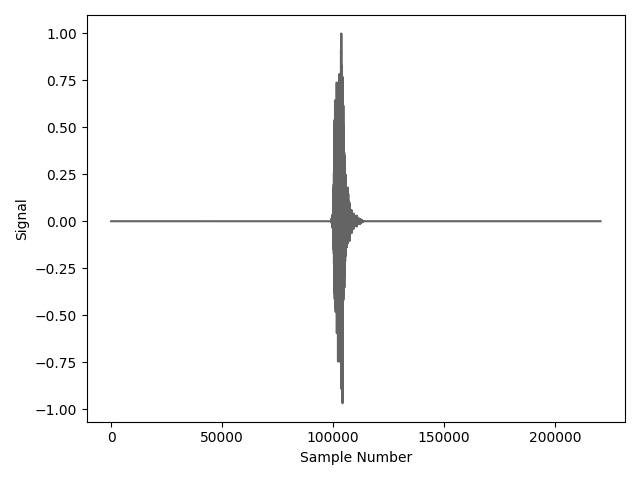

In [ ]:
# PIL object outputs an image
waveform_df['waveform_imgs'].iloc[0]

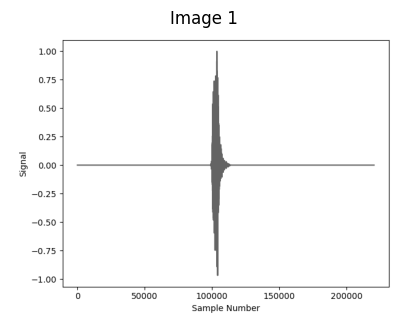

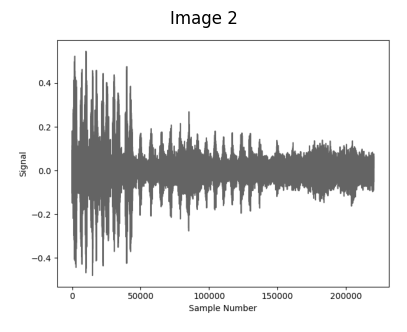

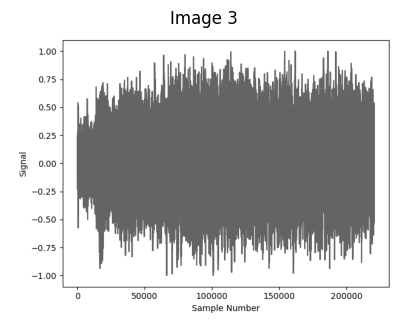

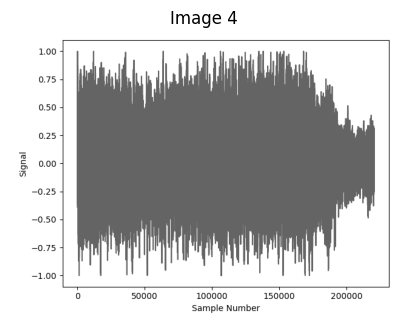

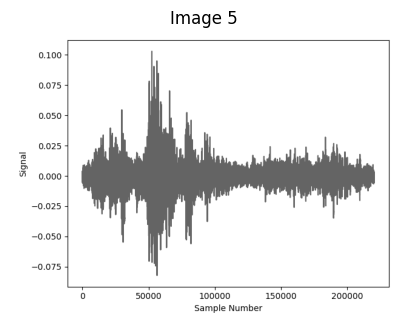

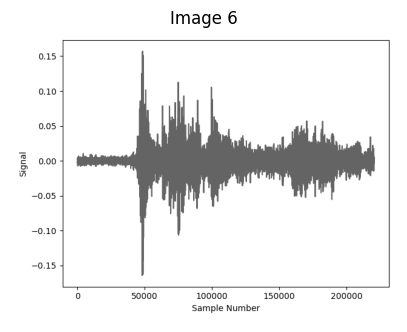

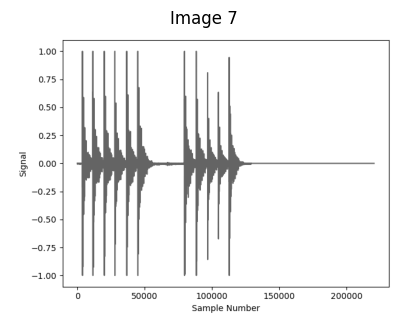

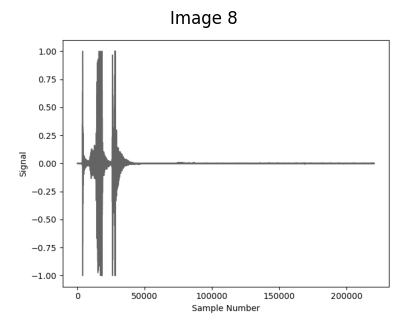

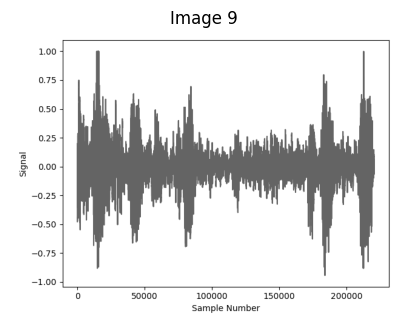

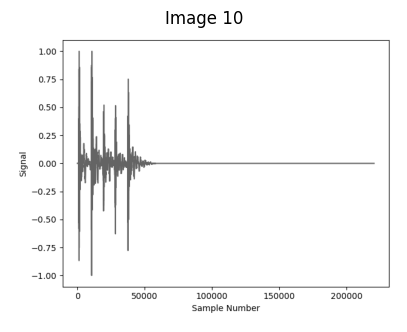

In [ ]:
# Creating a seperate column to store the PIL objects as numpy arrays
waveform_df['waveform_imgs_numpy'] = waveform_df['waveform_imgs'].apply(lambda img: np.array(img))  # PIL -> Numpy

for index, row in waveform_df.head(10).iterrows():
    plt.figure(figsize=(5, 5))  # Set the figure size
    plt.imshow(row['waveform_imgs_numpy'], cmap='gray')  # Display the image in grayscale
    plt.title(f"Image {index+1}")
    plt.axis('off')  # Turn off the axis
    plt.show()

## 2. Preprocessing the data

Initially, we are only going to downscale the images for smaller input into the neural network, due to compute limitations. I am keeping the original images, because I am not exactly sure what dimensions I should downscale to.

### No need to run

In [ ]:
waveform_df['waveform_imgs'].head()

0    <PIL.Image.Image image mode=L size=640x480 at ...
1    <PIL.Image.Image image mode=L size=640x480 at ...
2    <PIL.Image.Image image mode=L size=640x480 at ...
3    <PIL.Image.Image image mode=L size=640x480 at ...
4    <PIL.Image.Image image mode=L size=640x480 at ...
Name: waveform_imgs, dtype: object

In [ ]:
waveform_df.head()

,filename,fold,target,category,esc10,src_file,take,waveform_imgs,waveform_imgs_224x224,waveform_imgs_128x128
0,1-100032-A-0.wav,1,0,dog,True,100032,A,<PIL.Image.Image image mode=L size=640x480 at ...,None,None
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,<PIL.Image.Image image mode=L size=640x480 at ...,None,None
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,<PIL.Image.Image image mode=L size=640x480 at ...,None,None
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,<PIL.Image.Image image mode=L size=640x480 at ...,None,None
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,<PIL.Image.Image image mode=L size=640x480 at ...,None,None


### Run

In [ ]:
# Initiallizing columns which will store numpy arrays representing images of different dimensions

# PROBLEM: Can not store 2 dimensional arrays in a Pandas Data Frame

# For 224x224 arrays
#waveform_df['waveform_imgs_224x224'] = waveform_df.apply(lambda x: np.zeros((224, 224)), axis=1)

# For 128x128 arrays
#waveform_df['waveform_imgs_128x128'] = waveform_df.apply(lambda x: np.zeros((128, 128)), axis=1)



for ind, img in waveform_df['waveform_imgs'].items():
  waveform_df.loc[ind, 'waveform_imgs_224*224'] = img.resize([224, 224], Image.LANCZOS)
  waveform_df.loc[ind, 'waveform_imgs_128*128'] = img.resize([128, 128], Image.LANCZOS)

In [ ]:
# 1st dimension - the number of images
# 2nd and 3rd dimensions - The horizontal and vertical pixel count
# 4th dimension - Number of channels, which is one (grayscaled images)
resized_images = np.zeros((len(images), 224, 224))

for i, img in enumerate(images):
  resized_img = np.array(img.resize((224, 224), Image.LANCZOS)) # Resizing and Converting the images from PIL objects into numpy arrays
  resized_images[i] = resized_img # Storing

# Normalizing the image data for better training
norm_resized_images = resized_images/255


# Maybe save the resized images so don't have to resize them everytime I run the code
# f"waveform_{meta['filename'][index].replace('.wav', '')}.png"

NameError: name 'images' is not defined

(-0.5, 223.5, 223.5, -0.5)

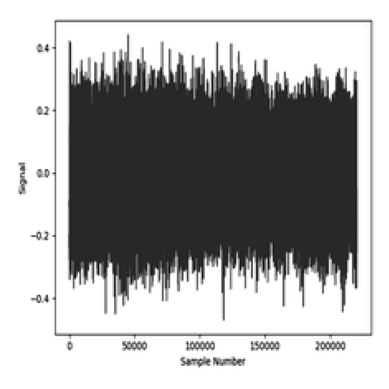

In [ ]:
plt.imshow(resized_images[4,:,:], cmap = 'gray')
plt.axis('off')

# **Task 1**: Developing a machine learning algorithm that can classify the sounds in terms of the 50 original categories using only the **spectrogram images**.

## Aproach 1

In [ ]:
waveform_df.head()

,filename,fold,target,category,esc10,src_file,take,waveform_imgs,waveform_imgs_224*224,waveform_imgs_128*128
0,1-100032-A-0.wav,1,0,dog,True,100032,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...


In [ ]:
# Run Incase need to remove columns
# waveform_df = waveform_df.drop(['waveform_imgs_224x224','waveform_imgs_128x128'], axis = 1)

In [ ]:
image_array = []
for ind, img in waveform_df['waveform_imgs'].items():
  img_arr = np.array(img)
  image_array.append(img_arr)

In [ ]:
def CNN():
  model = keras.Sequential([keras.layers.Input(shape = (480, 640, 1))])
  model.add(keras.layers.Resizing(32,32))

  model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
  model.add(keras.layers.LeakyReLU(alpha=0.01))
  model.add(keras.layers.MaxPooling2D((2, 2)))

  model.add(keras.layers.Conv2D(64, (3,3), padding='same')),
  model.add(keras.layers.LeakyReLU(alpha=0.01))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(30, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(50))
  model.add(keras.layers.Softmax()) # Converting the output neurons (scalars) into probabilities to allow for multi-class classification
  return model

In [ ]:
model = CNN()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

### **One hot encoding**

In the second approach the one-hot encoding is not used and each class is assigned an integer ranging from 0 to 49. This is more efficient, since we do not have 49 entries of a vector empty taking up memory.

In [ ]:
labels = [
    "airplane", "breathing", "brushing_teeth", "can_opening", "car_horn",
    "cat", "chainsaw", "chirping_birds", "church_bells", "clapping",
    "clock_alarm", "clock_tick", "coughing", "cow", "crackling_fire",
    "crickets", "crow", "crying_baby", "dog", "door_wood_creaks",
    "door_wood_knock", "drinking_sipping", "engine", "fireworks",
    "footsteps", "frog", "glass_breaking", "hand_saw", "helicopter",
    "hen", "insects", "keyboard_typing", "laughing", "mouse_click",
    "pig", "pouring_water", "rain", "rooster", "sea_waves", "sheep",
    "siren", "sneezing", "snoring", "thunderstorm", "toilet_flush",
    "train", "vacuum_cleaner", "washing_machine", "water_drops", "wind"
]

# One hot encoding with dictionary comprehension
label_to_digit = {label: i for i, label in enumerate(labels)}

### Splitting the training and validation

1. We will map the digits that encode the class of each sound onto the list of strings of labels.
2. We will split the data

In [ ]:
# Storing the category labels in an array
label_array = np.array([label_to_digit[string] for string in waveform_df['category']])

# Performing one-hot encoding
one_hot_labels = tf.keras.utils.to_categorical(label_array, num_classes=len(labels))

In [ ]:
# Splitting into training and validation data sets
images_train, images_test, labels_train, labels_test = train_test_split(image_array, one_hot_labels, test_size=0.2, random_state=42)

# Converting lists to numpy arrays for more convenient processing and normalizing
images_train = np.array(images_train) / 255
images_test = np.array(images_test) / 255

In [ ]:
label_to_digit

{'airplane': 0,
 'breathing': 1,
 'brushing_teeth': 2,
 'can_opening': 3,
 'car_horn': 4,
 'cat': 5,
 'chainsaw': 6,
 'chirping_birds': 7,
 'church_bells': 8,
 'clapping': 9,
 'clock_alarm': 10,
 'clock_tick': 11,
 'coughing': 12,
 'cow': 13,
 'crackling_fire': 14,
 'crickets': 15,
 'crow': 16,
 'crying_baby': 17,
 'dog': 18,
 'door_wood_creaks': 19,
 'door_wood_knock': 20,
 'drinking_sipping': 21,
 'engine': 22,
 'fireworks': 23,
 'footsteps': 24,
 'frog': 25,
 'glass_breaking': 26,
 'hand_saw': 27,
 'helicopter': 28,
 'hen': 29,
 'insects': 30,
 'keyboard_typing': 31,
 'laughing': 32,
 'mouse_click': 33,
 'pig': 34,
 'pouring_water': 35,
 'rain': 36,
 'rooster': 37,
 'sea_waves': 38,
 'sheep': 39,
 'siren': 40,
 'sneezing': 41,
 'snoring': 42,
 'thunderstorm': 43,
 'toilet_flush': 44,
 'train': 45,
 'vacuum_cleaner': 46,
 'washing_machine': 47,
 'water_drops': 48,
 'wind': 49}

In [ ]:
label_array

array([18,  7, 46, ..., 24, 39, 18])

In [ ]:
waveform_df.head()

,filename,fold,target,category,esc10,src_file,take,waveform_imgs,waveform_imgs_224*224,waveform_imgs_128*128
0,1-100032-A-0.wav,1,0,dog,True,100032,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,<PIL.Image.Image image mode=L size=640x480 at ...,<PIL.Image.Image image mode=L size=224x224 at ...,<PIL.Image.Image image mode=L size=128x128 at ...


### Augmenting the data

In [ ]:
# Augmenting the data
datagen = ImageDataGenerator(
         width_shift_range=0.15, # Moving the images from left to right
         zoom_range=0.1, # Zooming randomly up to 20%
         zca_whitening=False,
         horizontal_flip=True,
         vertical_flip=False,
         fill_mode = 'nearest')

# Have to include the channel number, which is 1 for grayscale images, as the datagen.fit requires 4D matrix)
images_train = images_train.reshape((images_train.shape[0], 480, 640, 1))

# Fit the generator to your data
datagen.fit(images_train)

In [ ]:
# Compiling the model with
# loss --> CategoricalCrossentropy  (We don't use SparseCategoricalCrossentropy, because the data is manyally one hot encoded)
# Optimizer --> Adam (Has Adaptive learning rate)
# Metric --> Accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(datagen.flow(images_train,labels_train, batch_size=32),
                    epochs = 15, validation_data = (images_test, labels_test))

# Getting a val accuracy of 0.0075 is too low, so there must be something fundamentally wrong with our setup

TypeError: object of type 'NoneType' has no len()

To debug this, we tested a few things.


1.   Incorrect Labels - manually inspecting the one_hot_labels (Not the issues)
2.   Excessive or Misapplied Augmentation - I re-used augmentation that I had used for my previous coursework.


```
Augmenting the data
datagen = ImageDataGenerator(
         rotation_range=25, # Rotating randomly the images up to 25°
         width_shift_range=0.15, # Moving the images from left to right
         height_shift_range=0.00, # We don't want to shift the height
         shear_range=0.10,
         zoom_range=0.05, # Zooming randomly up to 20%
         zca_whitening=False,
         horizontal_flip=False,
         vertical_flip=False,
         fill_mode = 'nearest')
```

This was used, however I realized that some of the data augmentation was not useful for this task like rotations. Whilst others, like **horizontal shift**s may be helpful, since it does not matter due to the horizontal invariance of the data. However the data is not invariant to rotations. Additionally, introducing **shear transformations** is not helpful since there are no spatial distortions. **Zooming** is useful because it emulates different intensities of sound, which may translate to sound being recorded at different distances.


## Approach 2


### Do not re-run (Storing spectograms in drive)

In [ ]:
meta = getMeta()
data = np.zeros((2000,128,500))
for i in tqdm(range(0, 2000)):
    spec = normalize(getSignalSpect(meta, i)[1])
    data[i] = spec

# Saving it on google drive so we don't have to re-run the code
save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/spectogram_data_array.npy'
np.save(save_file_path, data)

### Run from this point

In [ ]:
meta = getMeta()

save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/spectogram_data_array.npy'
spec_data = np.load(save_file_path)
print(spec_data.shape)

# Labels
labels = np.array(meta['target'])

(2000, 128, 500)


In [ ]:
# Splitting into training and validation data sets
images_train, images_test, labels_train, labels_test = train_test_split(spec_data, labels, test_size=0.2, random_state=42)

# Converting lists to numpy arrays for more convenient processing and normalizing
images_train = np.array(images_train) / 255
images_test = np.array(images_test) / 255

In [ ]:
# Augmenting the data

def CustomImageDataGenerator(a,b,c, images_train):
  datagen = ImageDataGenerator(width_shift_range = a, # Moving the images from left to right
                                      zoom_range=b,
                                      zca_whitening=False,
                                      horizontal_flip=c,
                                      vertical_flip=False,
                                      fill_mode = 'nearest')
  # Have to include the channel number, which is 1 for grayscale images, as the datagen.fit requires 4D matrix)
  images_train = images_train.reshape((images_train.shape[0], 128, 500, 1))

  # Fit the generator to your data
  return images_train

images_train_copy = CustomImageDataGenerator(0.15,0.1, True, images_train)

images_train_copy = datagen.fit(images_train_copy)

# Have to include the channel number, which is 1 for grayscale images, as the datagen.fit requires 4D matrix)
#images_train = images_train.reshape((images_train.shape[0], 128, 500, 1))

# Fit the generator to your data
#datagen.fit(images_train)

In [ ]:
def CNN(x):
  model = keras.Sequential([keras.layers.Input(shape = x)])
  model.add(keras.layers.Resizing(32,32))

  model.add(keras.layers.Conv2D(32, (3, 3), padding='same'))
  model.add(keras.layers.LeakyReLU(alpha=0.01))
  model.add(keras.layers.MaxPooling2D((2, 2)))

  model.add(keras.layers.Conv2D(64, (3,3), padding='same')),
  model.add(keras.layers.LeakyReLU(alpha=0.01))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(30, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(50))
  model.add(keras.layers.Softmax()) # Converting the output neurons (scalars) into probabilities to allow for multi-class classification
  model.summary()
  return model

model2 = CNN((128,500,1))

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_15 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                     

In [ ]:
# Compiling the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model2.fit(datagen.flow(images_train_copy,labels_train, batch_size=32),
                    epochs = 50, validation_data = (images_test, labels_test))

# Getting a val accuracy of 0.0075 is too low, so there must be something fundamentally wrong with our setup

Epoch 1/50
50/50 [==============================] - 7s 125ms/step - loss: 3.0003 - accuracy: 0.1856 - val_loss: 3.0400 - val_accuracy: 0.2350
Epoch 2/50
50/50 [==============================] - 6s 127ms/step - loss: 2.9762 - accuracy: 0.1719 - val_loss: 3.0393 - val_accuracy: 0.2075
Epoch 3/50
50/50 [==============================] - 6s 128ms/step - loss: 2.9678 - accuracy: 0.1688 - val_loss: 2.9397 - val_accuracy: 0.2225
Epoch 4/50
50/50 [==============================] - 6s 129ms/step - loss: 2.8807 - accuracy: 0.1937 - val_loss: 2.9578 - val_accuracy: 0.2275
Epoch 5/50
50/50 [==============================] - 6s 126ms/step - loss: 2.8405 - accuracy: 0.2081 - val_loss: 2.8596 - val_accuracy: 0.2250
Epoch 6/50
50/50 [==============================] - 6s 127ms/step - loss: 2.8515 - accuracy: 0.1988 - val_loss: 3.1402 - val_accuracy: 0.1825
Epoch 7/50
50/50 [==============================] - 6s 128ms/step - loss: 2.7898 - accuracy: 0.2300 - val_loss: 2.8563 - val_accuracy: 0.2250
Epoch 

In [ ]:
def CNN2(x):
  model = keras.Sequential([keras.layers.Input(shape = x)])
  model.add(keras.layers.Resizing(64,128))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  #model.add(keras.layers.Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  #model.add(keras.layers.Dropout(0.2))
  model.add(Dense(50, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.summary()

  return model

In [ ]:
model_Task2 = CNN2((128,500,1))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 64, 128, 1)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 61, 128)       36992     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 28, 128)      

In [ ]:
history = model_Task2.fit(datagen.flow(images_train,labels_train, batch_size=32),
                    epochs = 50, validation_data = (images_test, labels_test))

Epoch 1/50
50/50 [==============================] - 13s 149ms/step - loss: 3.9097 - accuracy: 0.0256 - val_loss: 3.8687 - val_accuracy: 0.0350
Epoch 2/50
50/50 [==============================] - 7s 130ms/step - loss: 3.8656 - accuracy: 0.0306 - val_loss: 3.8215 - val_accuracy: 0.0425
Epoch 3/50
50/50 [==============================] - 7s 134ms/step - loss: 3.8207 - accuracy: 0.0300 - val_loss: 3.6958 - val_accuracy: 0.0575
Epoch 4/50
50/50 [==============================] - 7s 130ms/step - loss: 3.7732 - accuracy: 0.0356 - val_loss: 3.6664 - val_accuracy: 0.0425
Epoch 5/50
50/50 [==============================] - 7s 133ms/step - loss: 3.7677 - accuracy: 0.0388 - val_loss: 3.6817 - val_accuracy: 0.0575
Epoch 6/50
50/50 [==============================] - 7s 132ms/step - loss: 3.7118 - accuracy: 0.0381 - val_loss: 3.6051 - val_accuracy: 0.0500
Epoch 7/50
50/50 [==============================] - 7s 132ms/step - loss: 3.7051 - accuracy: 0.0362 - val_loss: 3.6753 - val_accuracy: 0.0450
Epoch

## Generating Synthetic Audio Data

At this point I realize that maybe we can use synthetic audio data to increase the training set with data that has more variance which should allow for higher accuracy, as more variance can be captured for specific labels.

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import random

def random_pitch_shift(y, sr, min_steps=-4, max_steps=4):
    """
    Randomly shifts the pitch of the audio.
    """
    n_steps = random.uniform(min_steps, max_steps)
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

def random_time_stretch(y, sr, min_rate=0.8, max_rate=1.2):
    """
    Randomly stretches the time of the audio.
    """
    rate = random.uniform(min_rate, max_rate)
    return librosa.effects.time_stretch(y, rate=rate)

def apply_random_augmentation(audio_path, output_path, sr=44100):
    """
    Applies a random augmentation to the audio file.
    """
    y, sr = librosa.load(audio_path)

    # Choose a random augmentation
    augmentation_choice = random.choice([random_pitch_shift, random_time_stretch])

    # Apply the augmentation
    y_augmented = augmentation_choice(y, sr)

    # Save the augmented audio
    sf.write(output_path, y_augmented, sr)

    return y, sr

def fix_audio_length(y, sr, fixed_length=500):
    """
    Adjusts the audio signal to a fixed length by either padding with zeros or trimming.
    """
    # Calculate the fixed number of samples
    fixed_samples = sr * fixed_length

    if len(y) < fixed_samples:
        # If the audio is shorter than the desired fixed length, pad it
        y_padded = librosa.util.fix_length(y, size = fixed_samples)
        return y_padded
    else:
        # If the audio is longer, trim it
        return y[:fixed_samples]

# Path setup
audio_files_directory = '/content/drive/My Drive/UCL/ML_Y3/Project/audio'
output_directory = '/content/drive/My Drive/UCL/ML_Y3/Project/audio/synthetic audio'
audio_files = os.listdir(audio_files_directory)

meta = getMeta()

for index, row in meta[['filename', 'target']].iterrows():
    filename = row['filename']
    label = row['target']
    audio_path = os.path.join(audio_files_directory, filename)
    # Generating a unique output filename that includes the original filename
    # This helps maintain the mapping to the original label
    output_filename = f"aug_{filename}"
    output_path = os.path.join(output_directory, output_filename)

    signal, sr = apply_random_augmentation(audio_path, output_path)
    # No need to manually map the augmented file to its label;
    # The filename contains the necessary info to trace back to the original label

    print(f"{index}: Processed and saved: {output_filename} with label: {label}")

In [ ]:
meta_synth = getMeta()

meta_synth['filename'] = "aug_" + meta_synth['filename']

### Data Synthesis Problem
We run into a problem. When augmenting the time sometimes we reduce or increase the x-axis (time axis) of the generated spectogram. So, before generating the spectrogram images we need a function that will normalize the time to 500, by padding or trimming the arrays.

In [ ]:
def fix_audio_length(y, sr, fixed_length=500):
    """
    Adjusts the audio signal to a fixed length by either padding with zeros or trimming.
    """
    # Calculate the fixed number of samples
    #fixed_samples = sr * fixed_length
    fixed_samples = fixed_length
    if len(y) < fixed_samples:
        # If the audio is shorter than the desired fixed length, pad it
        y_padded = librosa.util.fix_length(y, size = fixed_samples)
        return y_padded
    else:
        # If the audio is longer, trim it
        return y[:fixed_samples]

In [ ]:
data_synth = np.zeros((2000,128,500))

# we will assume that sr is the same for the augmented images
sr = 44100

for i in tqdm(range(0, 2000)):

    spec = normalize(getSignalSpectSynth(meta_synth, i)[1])
    spec = fix_audio_length(spec, sr) # Keeping the audio length 500
    print(spec.shape)
    data_synth[i] = spec
    print(data_synth.shape)

# Saving it on google drive so we don't have to re-run the code
save_synth_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/synthetic_spectogram_data_array.npy'
np.save(save_synth_file_path, data_synth)

  0%|          | 0/2000 [00:00<?, ?it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 2/2000 [00:00<06:45,  4.93it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 3/2000 [00:00<10:34,  3.15it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 4/2000 [00:01<11:21,  2.93it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 5/2000 [00:01<11:55,  2.79it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 6/2000 [00:02<11:54,  2.79it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 7/2000 [00:02<11:57,  2.78it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 8/2000 [00:02<12:18,  2.70it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 9/2000 [00:03<12:34,  2.64it/s]

(128, 500)
(2000, 128, 500)


  0%|          | 10/2000 [00:03<12:37,  2.63it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 11/2000 [00:03<12:46,  2.59it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 12/2000 [00:04<13:11,  2.51it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 13/2000 [00:04<12:54,  2.57it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 14/2000 [00:05<12:45,  2.60it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 15/2000 [00:05<12:27,  2.66it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 16/2000 [00:05<12:23,  2.67it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 17/2000 [00:06<12:17,  2.69it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 18/2000 [00:06<12:26,  2.66it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 19/2000 [00:07<12:55,  2.55it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 20/2000 [00:07<12:41,  2.60it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 21/2000 [00:07<12:50,  2.57it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 22/2000 [00:08<12:33,  2.63it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 23/2000 [00:08<12:17,  2.68it/s]

(128, 500)
(2000, 128, 500)


  1%|          | 24/2000 [00:08<12:26,  2.65it/s]

(128, 500)
(2000, 128, 500)


  1%|▏         | 25/2000 [00:09<13:26,  2.45it/s]

(128, 500)
(2000, 128, 500)


  1%|▏         | 26/2000 [00:09<13:13,  2.49it/s]

(128, 500)
(2000, 128, 500)


  1%|▏         | 27/2000 [00:10<12:58,  2.54it/s]

(128, 500)
(2000, 128, 500)


  1%|▏         | 28/2000 [00:10<12:40,  2.59it/s]

(128, 500)
(2000, 128, 500)


  1%|▏         | 29/2000 [00:10<12:44,  2.58it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 30/2000 [00:11<12:41,  2.59it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 31/2000 [00:11<12:38,  2.60it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 32/2000 [00:12<12:27,  2.63it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 33/2000 [00:12<12:18,  2.66it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 34/2000 [00:12<12:15,  2.67it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 35/2000 [00:13<12:03,  2.72it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 36/2000 [00:13<12:00,  2.72it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 37/2000 [00:13<12:04,  2.71it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 38/2000 [00:14<12:19,  2.65it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 39/2000 [00:14<12:31,  2.61it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 40/2000 [00:15<12:21,  2.64it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 41/2000 [00:15<12:52,  2.53it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 42/2000 [00:15<12:51,  2.54it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 43/2000 [00:16<12:34,  2.59it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 44/2000 [00:16<12:38,  2.58it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 45/2000 [00:16<12:25,  2.62it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 46/2000 [00:17<12:34,  2.59it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 47/2000 [00:17<12:20,  2.64it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 48/2000 [00:18<12:17,  2.65it/s]

(128, 500)
(2000, 128, 500)


  2%|▏         | 49/2000 [00:18<12:17,  2.64it/s]

(128, 500)
(2000, 128, 500)


  2%|▎         | 50/2000 [00:18<12:19,  2.64it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 51/2000 [00:19<12:26,  2.61it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 52/2000 [00:19<12:12,  2.66it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 53/2000 [00:19<12:07,  2.68it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 54/2000 [00:20<11:54,  2.72it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 55/2000 [00:20<12:43,  2.55it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 56/2000 [00:21<12:47,  2.53it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 57/2000 [00:21<12:53,  2.51it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 58/2000 [00:21<12:42,  2.55it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 59/2000 [00:22<12:38,  2.56it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 60/2000 [00:22<12:32,  2.58it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 61/2000 [00:23<12:17,  2.63it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 62/2000 [00:23<12:10,  2.65it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 63/2000 [00:23<12:18,  2.62it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 64/2000 [00:24<12:05,  2.67it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 65/2000 [00:24<12:05,  2.67it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 66/2000 [00:25<12:28,  2.58it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 67/2000 [00:25<12:11,  2.64it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 68/2000 [00:25<12:01,  2.68it/s]

(128, 500)
(2000, 128, 500)


  3%|▎         | 69/2000 [00:26<11:55,  2.70it/s]

(128, 500)
(2000, 128, 500)


  4%|▎         | 70/2000 [00:26<11:57,  2.69it/s]

(128, 500)
(2000, 128, 500)


  4%|▎         | 71/2000 [00:26<11:59,  2.68it/s]

(128, 500)
(2000, 128, 500)


  4%|▎         | 72/2000 [00:27<12:06,  2.65it/s]

(128, 500)
(2000, 128, 500)


  4%|▎         | 73/2000 [00:27<11:48,  2.72it/s]

(128, 500)
(2000, 128, 500)


  4%|▎         | 74/2000 [00:27<11:39,  2.75it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 75/2000 [00:28<11:46,  2.73it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 76/2000 [00:28<11:43,  2.73it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 77/2000 [00:29<11:50,  2.71it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 78/2000 [00:29<11:37,  2.76it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 79/2000 [00:29<11:54,  2.69it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 80/2000 [00:30<12:08,  2.63it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 81/2000 [00:30<12:06,  2.64it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 82/2000 [00:30<12:10,  2.63it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 83/2000 [00:31<12:04,  2.65it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 84/2000 [00:31<11:57,  2.67it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 85/2000 [00:32<11:56,  2.67it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 86/2000 [00:32<11:52,  2.69it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 87/2000 [00:32<12:11,  2.61it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 88/2000 [00:33<11:54,  2.68it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 89/2000 [00:33<11:55,  2.67it/s]

(128, 500)
(2000, 128, 500)


  4%|▍         | 90/2000 [00:33<11:54,  2.67it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 91/2000 [00:34<11:56,  2.66it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 92/2000 [00:34<11:58,  2.65it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 93/2000 [00:35<12:07,  2.62it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 94/2000 [00:35<11:55,  2.67it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 95/2000 [00:35<11:50,  2.68it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 96/2000 [00:36<11:53,  2.67it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 97/2000 [00:36<11:43,  2.71it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 98/2000 [00:36<11:51,  2.67it/s]

(128, 500)
(2000, 128, 500)


  5%|▍         | 99/2000 [00:37<11:57,  2.65it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 100/2000 [00:37<12:12,  2.60it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 101/2000 [00:38<11:59,  2.64it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 102/2000 [00:38<11:39,  2.71it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 103/2000 [00:38<11:55,  2.65it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 104/2000 [00:39<11:46,  2.68it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 105/2000 [00:39<11:45,  2.69it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 106/2000 [00:39<11:40,  2.71it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 107/2000 [00:40<11:53,  2.65it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 108/2000 [00:40<12:24,  2.54it/s]

(128, 500)
(2000, 128, 500)


  5%|▌         | 109/2000 [00:41<12:07,  2.60it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 110/2000 [00:41<11:54,  2.64it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 111/2000 [00:41<11:47,  2.67it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 112/2000 [00:42<11:53,  2.65it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 113/2000 [00:42<11:56,  2.64it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 114/2000 [00:43<11:54,  2.64it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 115/2000 [00:43<12:14,  2.57it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 116/2000 [00:43<11:56,  2.63it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 117/2000 [00:44<11:51,  2.65it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 118/2000 [00:44<11:54,  2.63it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 119/2000 [00:44<11:33,  2.71it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 120/2000 [00:45<11:33,  2.71it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 121/2000 [00:45<11:41,  2.68it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 122/2000 [00:46<11:47,  2.66it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 123/2000 [00:46<11:59,  2.61it/s]

(128, 500)
(2000, 128, 500)


  6%|▌         | 124/2000 [00:46<11:37,  2.69it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 125/2000 [00:47<11:48,  2.65it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 126/2000 [00:47<11:48,  2.64it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 127/2000 [00:47<11:36,  2.69it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 128/2000 [00:48<11:34,  2.70it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 129/2000 [00:48<11:24,  2.73it/s]

(128, 500)
(2000, 128, 500)


  6%|▋         | 130/2000 [00:48<11:28,  2.72it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 131/2000 [00:49<11:48,  2.64it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 132/2000 [00:49<11:41,  2.66it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 133/2000 [00:50<12:04,  2.58it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 134/2000 [00:50<11:53,  2.62it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 135/2000 [00:50<12:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 136/2000 [00:51<12:04,  2.57it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 137/2000 [00:51<11:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 138/2000 [00:52<11:25,  2.71it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 139/2000 [00:52<11:18,  2.74it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 140/2000 [00:52<11:32,  2.69it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 141/2000 [00:53<11:24,  2.72it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 142/2000 [00:53<11:24,  2.71it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 143/2000 [00:53<11:21,  2.72it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 144/2000 [00:54<11:31,  2.68it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 145/2000 [00:54<11:51,  2.61it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 146/2000 [00:55<12:02,  2.57it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 147/2000 [00:55<11:49,  2.61it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 148/2000 [00:55<11:48,  2.61it/s]

(128, 500)
(2000, 128, 500)


  7%|▋         | 149/2000 [00:56<11:31,  2.68it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 150/2000 [00:56<11:21,  2.72it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 151/2000 [00:56<11:12,  2.75it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 152/2000 [00:57<11:26,  2.69it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 153/2000 [00:57<12:23,  2.49it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 154/2000 [00:58<11:59,  2.56it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 155/2000 [00:58<12:20,  2.49it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 156/2000 [00:58<11:56,  2.57it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 157/2000 [00:59<12:01,  2.56it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 158/2000 [00:59<11:49,  2.60it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 159/2000 [01:00<11:37,  2.64it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 160/2000 [01:00<11:29,  2.67it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 161/2000 [01:00<11:29,  2.67it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 162/2000 [01:01<11:42,  2.62it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 163/2000 [01:01<11:35,  2.64it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 164/2000 [01:01<11:41,  2.62it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 165/2000 [01:02<11:38,  2.63it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 166/2000 [01:02<11:47,  2.59it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 167/2000 [01:03<11:55,  2.56it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 168/2000 [01:03<11:44,  2.60it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 169/2000 [01:03<11:42,  2.60it/s]

(128, 500)
(2000, 128, 500)


  8%|▊         | 170/2000 [01:04<12:06,  2.52it/s]

(128, 500)
(2000, 128, 500)


  9%|▊         | 171/2000 [01:04<11:50,  2.57it/s]

(128, 500)
(2000, 128, 500)


  9%|▊         | 172/2000 [01:05<11:44,  2.60it/s]

(128, 500)
(2000, 128, 500)


  9%|▊         | 173/2000 [01:05<11:36,  2.62it/s]

(128, 500)
(2000, 128, 500)


  9%|▊         | 174/2000 [01:05<11:23,  2.67it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 175/2000 [01:06<11:10,  2.72it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 176/2000 [01:06<11:10,  2.72it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 177/2000 [01:06<10:57,  2.77it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 178/2000 [01:07<11:09,  2.72it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 179/2000 [01:07<11:31,  2.63it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 180/2000 [01:07<11:22,  2.67it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 181/2000 [01:08<11:13,  2.70it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 182/2000 [01:08<11:18,  2.68it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 183/2000 [01:09<11:28,  2.64it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 184/2000 [01:09<11:37,  2.60it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 185/2000 [01:09<11:43,  2.58it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 186/2000 [01:10<12:08,  2.49it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 187/2000 [01:10<11:42,  2.58it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 188/2000 [01:11<11:34,  2.61it/s]

(128, 500)
(2000, 128, 500)


  9%|▉         | 189/2000 [01:11<11:28,  2.63it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 190/2000 [01:11<11:45,  2.57it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 191/2000 [01:12<13:56,  2.16it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 192/2000 [01:12<13:03,  2.31it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 193/2000 [01:13<12:22,  2.43it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 194/2000 [01:13<12:04,  2.49it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 195/2000 [01:13<11:46,  2.55it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 196/2000 [01:14<11:37,  2.58it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 197/2000 [01:14<11:34,  2.60it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 198/2000 [01:15<11:38,  2.58it/s]

(128, 500)
(2000, 128, 500)


 10%|▉         | 199/2000 [01:15<11:33,  2.60it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 200/2000 [01:15<11:16,  2.66it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 201/2000 [01:16<11:21,  2.64it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 202/2000 [01:16<11:27,  2.62it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 203/2000 [01:16<11:23,  2.63it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 204/2000 [01:17<11:22,  2.63it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 205/2000 [01:17<11:18,  2.65it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 206/2000 [01:18<11:43,  2.55it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 207/2000 [01:18<11:22,  2.63it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 208/2000 [01:18<11:10,  2.67it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 209/2000 [01:19<11:20,  2.63it/s]

(128, 500)
(2000, 128, 500)


 10%|█         | 210/2000 [01:19<11:29,  2.60it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 211/2000 [01:20<11:36,  2.57it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 212/2000 [01:20<11:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 213/2000 [01:20<11:03,  2.69it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 214/2000 [01:21<11:33,  2.57it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 215/2000 [01:21<11:18,  2.63it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 216/2000 [01:21<11:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 217/2000 [01:22<11:18,  2.63it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 218/2000 [01:22<11:16,  2.63it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 219/2000 [01:23<11:19,  2.62it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 220/2000 [01:23<11:20,  2.62it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 221/2000 [01:23<11:27,  2.59it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 222/2000 [01:24<11:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 223/2000 [01:24<11:41,  2.53it/s]

(128, 500)
(2000, 128, 500)


 11%|█         | 224/2000 [01:25<11:32,  2.56it/s]

(128, 500)
(2000, 128, 500)


 11%|█▏        | 225/2000 [01:25<11:29,  2.57it/s]

(128, 500)
(2000, 128, 500)


 11%|█▏        | 226/2000 [01:25<11:17,  2.62it/s]

(128, 500)
(2000, 128, 500)


 11%|█▏        | 227/2000 [01:26<11:20,  2.61it/s]

(128, 500)
(2000, 128, 500)


 11%|█▏        | 228/2000 [01:26<11:13,  2.63it/s]

(128, 500)
(2000, 128, 500)


 11%|█▏        | 229/2000 [01:26<11:15,  2.62it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 230/2000 [01:27<11:00,  2.68it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 231/2000 [01:27<11:18,  2.61it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 232/2000 [01:28<11:10,  2.64it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 233/2000 [01:28<11:13,  2.62it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 234/2000 [01:28<11:07,  2.64it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 235/2000 [01:29<11:11,  2.63it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 236/2000 [01:29<11:09,  2.64it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 237/2000 [01:29<10:50,  2.71it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 238/2000 [01:30<10:44,  2.74it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 239/2000 [01:30<10:35,  2.77it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 240/2000 [01:31<10:45,  2.73it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 241/2000 [01:31<11:17,  2.60it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 242/2000 [01:31<11:35,  2.53it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 243/2000 [01:32<11:21,  2.58it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 244/2000 [01:32<11:16,  2.60it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 245/2000 [01:33<11:54,  2.46it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 246/2000 [01:33<11:27,  2.55it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 247/2000 [01:33<11:36,  2.52it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 248/2000 [01:34<11:21,  2.57it/s]

(128, 500)
(2000, 128, 500)


 12%|█▏        | 249/2000 [01:34<10:59,  2.65it/s]

(128, 500)
(2000, 128, 500)


 12%|█▎        | 250/2000 [01:34<11:00,  2.65it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 251/2000 [01:35<11:00,  2.65it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 252/2000 [01:35<10:52,  2.68it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 253/2000 [01:36<10:39,  2.73it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 254/2000 [01:36<10:44,  2.71it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 255/2000 [01:36<10:58,  2.65it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 256/2000 [01:37<11:04,  2.63it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 257/2000 [01:37<11:03,  2.63it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 258/2000 [01:37<11:09,  2.60it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 259/2000 [01:38<11:25,  2.54it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 260/2000 [01:38<11:05,  2.61it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 261/2000 [01:39<11:05,  2.61it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 262/2000 [01:39<10:52,  2.66it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 263/2000 [01:39<10:51,  2.67it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 264/2000 [01:40<10:50,  2.67it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 265/2000 [01:40<10:55,  2.65it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 266/2000 [01:41<11:08,  2.59it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 267/2000 [01:41<11:05,  2.60it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 268/2000 [01:41<11:08,  2.59it/s]

(128, 500)
(2000, 128, 500)


 13%|█▎        | 269/2000 [01:42<11:11,  2.58it/s]

(128, 500)
(2000, 128, 500)


 14%|█▎        | 270/2000 [01:42<10:53,  2.65it/s]

(128, 500)
(2000, 128, 500)


 14%|█▎        | 271/2000 [01:42<10:45,  2.68it/s]

(128, 500)
(2000, 128, 500)


 14%|█▎        | 272/2000 [01:43<10:35,  2.72it/s]

(128, 500)
(2000, 128, 500)


 14%|█▎        | 273/2000 [01:43<10:46,  2.67it/s]

(128, 500)
(2000, 128, 500)


 14%|█▎        | 274/2000 [01:44<10:57,  2.63it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 275/2000 [01:44<10:49,  2.66it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 276/2000 [01:44<11:12,  2.57it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 277/2000 [01:45<10:50,  2.65it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 278/2000 [01:45<10:53,  2.64it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 279/2000 [01:45<10:51,  2.64it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 280/2000 [01:46<10:48,  2.65it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 281/2000 [01:46<10:58,  2.61it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 282/2000 [01:47<11:06,  2.58it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 283/2000 [01:47<11:30,  2.49it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 284/2000 [01:47<11:19,  2.52it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 285/2000 [01:48<11:10,  2.56it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 286/2000 [01:48<11:13,  2.55it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 287/2000 [01:49<11:35,  2.46it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 288/2000 [01:49<11:21,  2.51it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 289/2000 [01:49<11:08,  2.56it/s]

(128, 500)
(2000, 128, 500)


 14%|█▍        | 290/2000 [01:50<10:47,  2.64it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 291/2000 [01:50<10:54,  2.61it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 292/2000 [01:51<10:59,  2.59it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 293/2000 [01:51<10:46,  2.64it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 294/2000 [01:51<10:34,  2.69it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 295/2000 [01:52<10:27,  2.72it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 296/2000 [01:52<10:37,  2.67it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 297/2000 [01:52<10:54,  2.60it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 298/2000 [01:53<11:19,  2.51it/s]

(128, 500)
(2000, 128, 500)


 15%|█▍        | 299/2000 [01:53<11:20,  2.50it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 300/2000 [01:54<11:04,  2.56it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 301/2000 [01:54<10:51,  2.61it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 302/2000 [01:54<10:41,  2.65it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 303/2000 [01:55<10:37,  2.66it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 304/2000 [01:55<10:22,  2.72it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 305/2000 [01:55<10:57,  2.58it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 306/2000 [01:56<11:01,  2.56it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 307/2000 [01:56<10:48,  2.61it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 308/2000 [01:57<11:20,  2.49it/s]

(128, 500)
(2000, 128, 500)


 15%|█▌        | 309/2000 [01:57<10:59,  2.56it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 310/2000 [01:57<10:53,  2.58it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 311/2000 [01:58<10:31,  2.68it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 312/2000 [01:58<10:48,  2.60it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 313/2000 [01:59<10:57,  2.56it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 314/2000 [01:59<10:53,  2.58it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 315/2000 [01:59<10:53,  2.58it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 316/2000 [02:00<10:59,  2.55it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 317/2000 [02:00<10:48,  2.59it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 318/2000 [02:00<10:40,  2.62it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 319/2000 [02:01<10:38,  2.63it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 320/2000 [02:01<10:31,  2.66it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 321/2000 [02:02<10:31,  2.66it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 322/2000 [02:02<10:22,  2.70it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 323/2000 [02:02<10:29,  2.67it/s]

(128, 500)
(2000, 128, 500)


 16%|█▌        | 324/2000 [02:03<10:22,  2.69it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 325/2000 [02:03<10:24,  2.68it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 326/2000 [02:03<10:17,  2.71it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 327/2000 [02:04<10:19,  2.70it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 328/2000 [02:04<10:16,  2.71it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 329/2000 [02:05<10:18,  2.70it/s]

(128, 500)
(2000, 128, 500)


 16%|█▋        | 330/2000 [02:05<10:31,  2.64it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 331/2000 [02:05<10:46,  2.58it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 332/2000 [02:06<10:46,  2.58it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 333/2000 [02:06<10:27,  2.66it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 334/2000 [02:06<10:26,  2.66it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 335/2000 [02:07<10:30,  2.64it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 336/2000 [02:07<10:25,  2.66it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 337/2000 [02:08<10:19,  2.68it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 338/2000 [02:08<10:10,  2.72it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 339/2000 [02:08<10:09,  2.72it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 340/2000 [02:09<10:14,  2.70it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 341/2000 [02:09<10:06,  2.74it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 342/2000 [02:09<10:26,  2.65it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 343/2000 [02:10<10:20,  2.67it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 344/2000 [02:10<10:25,  2.65it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 345/2000 [02:11<10:46,  2.56it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 346/2000 [02:11<10:35,  2.60it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 347/2000 [02:11<10:50,  2.54it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 348/2000 [02:12<10:45,  2.56it/s]

(128, 500)
(2000, 128, 500)


 17%|█▋        | 349/2000 [02:12<10:35,  2.60it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 350/2000 [02:13<10:32,  2.61it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 351/2000 [02:13<10:28,  2.62it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 352/2000 [02:13<10:15,  2.68it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 353/2000 [02:14<10:26,  2.63it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 354/2000 [02:14<10:15,  2.67it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 355/2000 [02:14<10:09,  2.70it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 356/2000 [02:15<10:26,  2.62it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 357/2000 [02:15<11:18,  2.42it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 358/2000 [02:16<11:03,  2.48it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 359/2000 [02:16<10:54,  2.51it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 360/2000 [02:16<10:49,  2.52it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 361/2000 [02:17<10:37,  2.57it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 362/2000 [02:17<10:29,  2.60it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 363/2000 [02:18<10:19,  2.64it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 364/2000 [02:18<10:12,  2.67it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 365/2000 [02:18<10:55,  2.49it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 366/2000 [02:19<10:46,  2.53it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 367/2000 [02:19<10:37,  2.56it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 368/2000 [02:20<10:21,  2.63it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 369/2000 [02:20<10:04,  2.70it/s]

(128, 500)
(2000, 128, 500)


 18%|█▊        | 370/2000 [02:20<10:01,  2.71it/s]

(128, 500)
(2000, 128, 500)


 19%|█▊        | 371/2000 [02:21<10:25,  2.60it/s]

(128, 500)
(2000, 128, 500)


 19%|█▊        | 372/2000 [02:21<10:10,  2.67it/s]

(128, 500)
(2000, 128, 500)


 19%|█▊        | 373/2000 [02:21<10:01,  2.71it/s]

(128, 500)
(2000, 128, 500)


 19%|█▊        | 374/2000 [02:22<10:18,  2.63it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 375/2000 [02:22<10:39,  2.54it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 376/2000 [02:23<10:15,  2.64it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 377/2000 [02:23<10:09,  2.66it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 378/2000 [02:23<09:59,  2.71it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 379/2000 [02:24<10:42,  2.52it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 380/2000 [02:24<10:37,  2.54it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 381/2000 [02:25<10:51,  2.49it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 382/2000 [02:25<10:35,  2.55it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 383/2000 [02:25<11:00,  2.45it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 384/2000 [02:26<11:14,  2.40it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 385/2000 [02:26<10:52,  2.48it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 386/2000 [02:27<10:45,  2.50it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 387/2000 [02:27<10:31,  2.55it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 388/2000 [02:27<10:18,  2.61it/s]

(128, 500)
(2000, 128, 500)


 19%|█▉        | 389/2000 [02:28<10:11,  2.63it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 390/2000 [02:28<10:12,  2.63it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 391/2000 [02:28<10:02,  2.67it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 392/2000 [02:29<10:02,  2.67it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 393/2000 [02:29<10:04,  2.66it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 394/2000 [02:30<09:57,  2.69it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 395/2000 [02:30<09:55,  2.70it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 396/2000 [02:30<09:47,  2.73it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 397/2000 [02:31<09:50,  2.72it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 398/2000 [02:31<09:53,  2.70it/s]

(128, 500)
(2000, 128, 500)


 20%|█▉        | 399/2000 [02:31<10:00,  2.67it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 400/2000 [02:32<09:57,  2.68it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 401/2000 [02:32<10:01,  2.66it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 402/2000 [02:33<10:04,  2.64it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 403/2000 [02:33<09:58,  2.67it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 404/2000 [02:33<09:54,  2.69it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 405/2000 [02:34<10:08,  2.62it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 406/2000 [02:34<10:00,  2.66it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 407/2000 [02:34<10:18,  2.58it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 408/2000 [02:35<10:25,  2.54it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 409/2000 [02:35<10:16,  2.58it/s]

(128, 500)
(2000, 128, 500)


 20%|██        | 410/2000 [02:36<10:15,  2.58it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 411/2000 [02:36<10:13,  2.59it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 412/2000 [02:36<10:12,  2.59it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 413/2000 [02:37<09:53,  2.68it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 414/2000 [02:37<09:47,  2.70it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 415/2000 [02:37<09:42,  2.72it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 416/2000 [02:38<10:18,  2.56it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 417/2000 [02:38<10:41,  2.47it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 418/2000 [02:39<10:36,  2.48it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 419/2000 [02:39<10:21,  2.54it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 420/2000 [02:39<10:23,  2.53it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 421/2000 [02:40<10:59,  2.39it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 422/2000 [02:40<10:53,  2.42it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 423/2000 [02:41<10:37,  2.47it/s]

(128, 500)
(2000, 128, 500)


 21%|██        | 424/2000 [02:41<10:28,  2.51it/s]

(128, 500)
(2000, 128, 500)


 21%|██▏       | 425/2000 [02:41<10:11,  2.58it/s]

(128, 500)
(2000, 128, 500)


 21%|██▏       | 426/2000 [02:42<10:10,  2.58it/s]

(128, 500)
(2000, 128, 500)


 21%|██▏       | 427/2000 [02:42<10:02,  2.61it/s]

(128, 500)
(2000, 128, 500)


 21%|██▏       | 428/2000 [02:43<10:05,  2.60it/s]

(128, 500)
(2000, 128, 500)


 21%|██▏       | 429/2000 [02:43<10:10,  2.57it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 430/2000 [02:43<09:59,  2.62it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 431/2000 [02:44<09:48,  2.67it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 432/2000 [02:44<09:44,  2.68it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 433/2000 [02:45<09:46,  2.67it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 434/2000 [02:45<09:53,  2.64it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 435/2000 [02:45<09:56,  2.62it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 436/2000 [02:46<09:49,  2.65it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 437/2000 [02:46<09:50,  2.65it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 438/2000 [02:46<09:42,  2.68it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 439/2000 [02:47<09:42,  2.68it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 440/2000 [02:47<09:40,  2.69it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 441/2000 [02:48<10:00,  2.60it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 442/2000 [02:48<10:04,  2.58it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 443/2000 [02:48<10:03,  2.58it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 444/2000 [02:49<09:54,  2.62it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 445/2000 [02:49<10:01,  2.58it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 446/2000 [02:49<10:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 447/2000 [02:50<10:08,  2.55it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 448/2000 [02:50<10:08,  2.55it/s]

(128, 500)
(2000, 128, 500)


 22%|██▏       | 449/2000 [02:51<10:20,  2.50it/s]

(128, 500)
(2000, 128, 500)


 22%|██▎       | 450/2000 [02:51<10:03,  2.57it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 451/2000 [02:51<09:44,  2.65it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 452/2000 [02:52<09:42,  2.66it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 453/2000 [02:52<09:48,  2.63it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 454/2000 [02:53<09:41,  2.66it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 455/2000 [02:53<09:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 456/2000 [02:53<09:59,  2.58it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 457/2000 [02:54<09:47,  2.63it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 458/2000 [02:54<10:31,  2.44it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 459/2000 [02:55<10:27,  2.45it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 460/2000 [02:55<10:04,  2.55it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 461/2000 [02:55<09:54,  2.59it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 462/2000 [02:56<09:40,  2.65it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 463/2000 [02:56<09:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 464/2000 [02:56<09:40,  2.65it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 465/2000 [02:57<09:46,  2.62it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 466/2000 [02:57<09:36,  2.66it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 467/2000 [02:58<09:39,  2.65it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 468/2000 [02:58<09:34,  2.67it/s]

(128, 500)
(2000, 128, 500)


 23%|██▎       | 469/2000 [02:58<09:31,  2.68it/s]

(128, 500)
(2000, 128, 500)


 24%|██▎       | 470/2000 [02:59<09:32,  2.67it/s]

(128, 500)
(2000, 128, 500)


 24%|██▎       | 471/2000 [02:59<09:24,  2.71it/s]

(128, 500)
(2000, 128, 500)


 24%|██▎       | 472/2000 [02:59<09:22,  2.71it/s]

(128, 500)
(2000, 128, 500)


 24%|██▎       | 473/2000 [03:00<09:35,  2.66it/s]

(128, 500)
(2000, 128, 500)


 24%|██▎       | 474/2000 [03:00<09:31,  2.67it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 475/2000 [03:01<09:27,  2.69it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 476/2000 [03:01<09:15,  2.75it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 477/2000 [03:01<09:22,  2.71it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 478/2000 [03:02<09:15,  2.74it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 479/2000 [03:02<09:38,  2.63it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 480/2000 [03:02<09:34,  2.65it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 481/2000 [03:03<09:16,  2.73it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 482/2000 [03:03<09:39,  2.62it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 483/2000 [03:04<09:34,  2.64it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 484/2000 [03:04<09:30,  2.66it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 485/2000 [03:04<09:21,  2.70it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 486/2000 [03:05<09:27,  2.67it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 487/2000 [03:05<09:39,  2.61it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 488/2000 [03:05<09:38,  2.61it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 489/2000 [03:06<09:31,  2.65it/s]

(128, 500)
(2000, 128, 500)


 24%|██▍       | 490/2000 [03:06<09:30,  2.65it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 491/2000 [03:07<09:18,  2.70it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 492/2000 [03:07<09:22,  2.68it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 493/2000 [03:07<09:25,  2.67it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 494/2000 [03:08<09:26,  2.66it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 495/2000 [03:08<09:34,  2.62it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 496/2000 [03:08<09:40,  2.59it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 497/2000 [03:09<09:31,  2.63it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 498/2000 [03:09<09:17,  2.69it/s]

(128, 500)
(2000, 128, 500)


 25%|██▍       | 499/2000 [03:10<09:11,  2.72it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 500/2000 [03:10<09:30,  2.63it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 501/2000 [03:10<09:20,  2.68it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 502/2000 [03:11<09:17,  2.69it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 503/2000 [03:11<09:17,  2.69it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 504/2000 [03:11<09:11,  2.71it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 505/2000 [03:12<09:09,  2.72it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 506/2000 [03:12<09:16,  2.69it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 507/2000 [03:13<09:17,  2.68it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 508/2000 [03:13<09:13,  2.70it/s]

(128, 500)
(2000, 128, 500)


 25%|██▌       | 509/2000 [03:13<09:12,  2.70it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 510/2000 [03:14<09:16,  2.68it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 511/2000 [03:14<09:34,  2.59it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 512/2000 [03:14<09:28,  2.62it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 513/2000 [03:15<09:38,  2.57it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 514/2000 [03:15<09:24,  2.63it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 515/2000 [03:16<09:33,  2.59it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 516/2000 [03:16<09:28,  2.61it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 517/2000 [03:16<09:52,  2.50it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 518/2000 [03:17<09:48,  2.52it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 519/2000 [03:17<09:33,  2.58it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 520/2000 [03:18<09:28,  2.60it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 521/2000 [03:18<09:21,  2.64it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 522/2000 [03:18<09:24,  2.62it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 523/2000 [03:19<09:27,  2.60it/s]

(128, 500)
(2000, 128, 500)


 26%|██▌       | 524/2000 [03:19<09:24,  2.61it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 525/2000 [03:19<09:15,  2.66it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 526/2000 [03:20<09:07,  2.69it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 527/2000 [03:20<09:03,  2.71it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 528/2000 [03:21<09:16,  2.65it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 529/2000 [03:21<09:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 26%|██▋       | 530/2000 [03:21<09:34,  2.56it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 531/2000 [03:22<09:46,  2.51it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 532/2000 [03:22<09:19,  2.62it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 533/2000 [03:22<09:17,  2.63it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 534/2000 [03:23<09:07,  2.68it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 535/2000 [03:23<09:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 536/2000 [03:24<09:06,  2.68it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 537/2000 [03:24<09:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 538/2000 [03:24<09:07,  2.67it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 539/2000 [03:25<08:56,  2.72it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 540/2000 [03:25<09:02,  2.69it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 541/2000 [03:25<09:06,  2.67it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 542/2000 [03:26<09:01,  2.69it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 543/2000 [03:26<09:03,  2.68it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 544/2000 [03:27<09:02,  2.69it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 545/2000 [03:27<08:51,  2.74it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 546/2000 [03:27<08:48,  2.75it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 547/2000 [03:28<08:49,  2.74it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 548/2000 [03:28<08:42,  2.78it/s]

(128, 500)
(2000, 128, 500)


 27%|██▋       | 549/2000 [03:28<08:39,  2.79it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 550/2000 [03:29<08:47,  2.75it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 551/2000 [03:29<08:48,  2.74it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 552/2000 [03:29<08:46,  2.75it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 553/2000 [03:30<08:52,  2.72it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 554/2000 [03:30<08:47,  2.74it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 555/2000 [03:31<08:53,  2.71it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 556/2000 [03:31<08:58,  2.68it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 557/2000 [03:31<09:02,  2.66it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 558/2000 [03:32<08:56,  2.69it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 559/2000 [03:32<08:53,  2.70it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 560/2000 [03:32<08:47,  2.73it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 561/2000 [03:33<08:40,  2.77it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 562/2000 [03:33<08:33,  2.80it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 563/2000 [03:33<08:46,  2.73it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 564/2000 [03:34<08:59,  2.66it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 565/2000 [03:34<08:56,  2.68it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 566/2000 [03:35<09:02,  2.64it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 567/2000 [03:35<08:54,  2.68it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 568/2000 [03:35<08:49,  2.70it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 569/2000 [03:36<08:48,  2.71it/s]

(128, 500)
(2000, 128, 500)


 28%|██▊       | 570/2000 [03:36<09:13,  2.58it/s]

(128, 500)
(2000, 128, 500)


 29%|██▊       | 571/2000 [03:37<09:16,  2.57it/s]

(128, 500)
(2000, 128, 500)


 29%|██▊       | 572/2000 [03:37<08:59,  2.65it/s]

(128, 500)
(2000, 128, 500)


 29%|██▊       | 573/2000 [03:37<08:55,  2.67it/s]

(128, 500)
(2000, 128, 500)


 29%|██▊       | 574/2000 [03:38<08:58,  2.65it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 575/2000 [03:38<08:52,  2.68it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 576/2000 [03:38<08:56,  2.65it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 577/2000 [03:39<09:01,  2.63it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 578/2000 [03:39<08:59,  2.64it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 579/2000 [03:40<09:08,  2.59it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 580/2000 [03:40<09:06,  2.60it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 581/2000 [03:40<09:03,  2.61it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 582/2000 [03:41<08:51,  2.67it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 583/2000 [03:41<08:54,  2.65it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 584/2000 [03:41<08:51,  2.67it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 585/2000 [03:42<08:48,  2.68it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 586/2000 [03:42<08:39,  2.72it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 587/2000 [03:43<08:39,  2.72it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 588/2000 [03:43<08:58,  2.62it/s]

(128, 500)
(2000, 128, 500)


 29%|██▉       | 589/2000 [03:43<08:47,  2.67it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 590/2000 [03:44<08:49,  2.66it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 591/2000 [03:44<08:39,  2.71it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 592/2000 [03:44<08:40,  2.70it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 593/2000 [03:45<08:47,  2.67it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 594/2000 [03:45<08:36,  2.72it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 595/2000 [03:46<08:36,  2.72it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 596/2000 [03:46<08:36,  2.72it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 597/2000 [03:46<08:33,  2.73it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 598/2000 [03:47<08:26,  2.77it/s]

(128, 500)
(2000, 128, 500)


 30%|██▉       | 599/2000 [03:47<08:34,  2.72it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 600/2000 [03:47<08:43,  2.67it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 601/2000 [03:48<08:43,  2.67it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 602/2000 [03:48<08:47,  2.65it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 603/2000 [03:49<08:42,  2.68it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 604/2000 [03:49<08:39,  2.69it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 605/2000 [03:49<08:51,  2.62it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 606/2000 [03:50<08:51,  2.62it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 607/2000 [03:50<08:50,  2.63it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 608/2000 [03:50<08:45,  2.65it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 609/2000 [03:51<08:42,  2.66it/s]

(128, 500)
(2000, 128, 500)


 30%|███       | 610/2000 [03:51<08:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 611/2000 [03:52<08:51,  2.61it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 612/2000 [03:52<08:53,  2.60it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 613/2000 [03:52<08:54,  2.60it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 614/2000 [03:53<08:58,  2.57it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 615/2000 [03:53<09:03,  2.55it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 616/2000 [03:54<09:10,  2.51it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 617/2000 [03:54<08:53,  2.59it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 618/2000 [03:54<09:01,  2.55it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 619/2000 [03:55<08:47,  2.62it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 620/2000 [03:55<08:45,  2.62it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 621/2000 [03:55<08:41,  2.65it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 622/2000 [03:56<08:29,  2.71it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 623/2000 [03:56<08:27,  2.71it/s]

(128, 500)
(2000, 128, 500)


 31%|███       | 624/2000 [03:56<08:24,  2.73it/s]

(128, 500)
(2000, 128, 500)


 31%|███▏      | 625/2000 [03:57<08:30,  2.69it/s]

(128, 500)
(2000, 128, 500)


 31%|███▏      | 626/2000 [03:57<08:17,  2.76it/s]

(128, 500)
(2000, 128, 500)


 31%|███▏      | 627/2000 [03:58<08:14,  2.78it/s]

(128, 500)
(2000, 128, 500)


 31%|███▏      | 628/2000 [03:58<08:10,  2.80it/s]

(128, 500)
(2000, 128, 500)


 31%|███▏      | 629/2000 [03:58<08:20,  2.74it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 630/2000 [03:59<08:26,  2.70it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 631/2000 [03:59<08:32,  2.67it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 632/2000 [03:59<08:20,  2.73it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 633/2000 [04:00<08:18,  2.74it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 634/2000 [04:00<08:14,  2.76it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 635/2000 [04:00<08:12,  2.77it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 636/2000 [04:01<08:25,  2.70it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 637/2000 [04:01<08:27,  2.69it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 638/2000 [04:02<09:16,  2.45it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 639/2000 [04:02<09:26,  2.40it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 640/2000 [04:03<09:26,  2.40it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 641/2000 [04:03<09:12,  2.46it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 642/2000 [04:03<08:53,  2.54it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 643/2000 [04:04<08:38,  2.62it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 644/2000 [04:04<08:45,  2.58it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 645/2000 [04:05<08:52,  2.55it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 646/2000 [04:05<08:37,  2.62it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 647/2000 [04:05<08:46,  2.57it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 648/2000 [04:06<08:27,  2.66it/s]

(128, 500)
(2000, 128, 500)


 32%|███▏      | 649/2000 [04:06<08:32,  2.64it/s]

(128, 500)
(2000, 128, 500)


 32%|███▎      | 650/2000 [04:06<08:29,  2.65it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 651/2000 [04:07<08:28,  2.65it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 652/2000 [04:07<08:29,  2.65it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 653/2000 [04:08<08:25,  2.67it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 654/2000 [04:08<08:37,  2.60it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 655/2000 [04:08<08:24,  2.67it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 656/2000 [04:09<08:23,  2.67it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 657/2000 [04:09<08:19,  2.69it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 658/2000 [04:09<08:24,  2.66it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 659/2000 [04:10<08:23,  2.67it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 660/2000 [04:10<08:20,  2.68it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 661/2000 [04:11<08:25,  2.65it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 662/2000 [04:11<08:21,  2.67it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 663/2000 [04:11<08:24,  2.65it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 664/2000 [04:12<08:36,  2.59it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 665/2000 [04:12<08:25,  2.64it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 666/2000 [04:12<08:31,  2.61it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 667/2000 [04:13<08:34,  2.59it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 668/2000 [04:13<08:32,  2.60it/s]

(128, 500)
(2000, 128, 500)


 33%|███▎      | 669/2000 [04:14<08:29,  2.61it/s]

(128, 500)
(2000, 128, 500)


 34%|███▎      | 670/2000 [04:14<08:42,  2.55it/s]

(128, 500)
(2000, 128, 500)


 34%|███▎      | 671/2000 [04:14<08:38,  2.56it/s]

(128, 500)
(2000, 128, 500)


 34%|███▎      | 672/2000 [04:15<08:22,  2.64it/s]

(128, 500)
(2000, 128, 500)


 34%|███▎      | 673/2000 [04:15<08:17,  2.66it/s]

(128, 500)
(2000, 128, 500)


 34%|███▎      | 674/2000 [04:15<08:04,  2.74it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 675/2000 [04:16<08:05,  2.73it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 676/2000 [04:16<08:09,  2.70it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 677/2000 [04:17<08:03,  2.74it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 678/2000 [04:17<08:14,  2.67it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 679/2000 [04:17<08:10,  2.69it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 680/2000 [04:18<08:16,  2.66it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 681/2000 [04:18<08:36,  2.55it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 682/2000 [04:19<09:03,  2.42it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 683/2000 [04:19<08:43,  2.52it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 684/2000 [04:19<08:27,  2.59it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 685/2000 [04:20<08:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 686/2000 [04:20<08:13,  2.66it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 687/2000 [04:20<08:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 688/2000 [04:21<08:12,  2.66it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 689/2000 [04:21<08:13,  2.66it/s]

(128, 500)
(2000, 128, 500)


 34%|███▍      | 690/2000 [04:22<08:17,  2.63it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 691/2000 [04:22<08:18,  2.62it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 692/2000 [04:22<08:24,  2.59it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 693/2000 [04:23<08:22,  2.60it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 694/2000 [04:23<08:11,  2.66it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 695/2000 [04:23<08:03,  2.70it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 696/2000 [04:24<07:59,  2.72it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 697/2000 [04:24<08:09,  2.66it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 698/2000 [04:25<08:02,  2.70it/s]

(128, 500)
(2000, 128, 500)


 35%|███▍      | 699/2000 [04:25<08:03,  2.69it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 700/2000 [04:25<08:06,  2.67it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 701/2000 [04:26<08:04,  2.68it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 702/2000 [04:26<08:10,  2.65it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 703/2000 [04:26<08:03,  2.68it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 704/2000 [04:27<07:57,  2.72it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 705/2000 [04:27<08:01,  2.69it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 706/2000 [04:28<08:00,  2.69it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 707/2000 [04:28<08:03,  2.68it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 708/2000 [04:28<07:54,  2.72it/s]

(128, 500)
(2000, 128, 500)


 35%|███▌      | 709/2000 [04:29<07:49,  2.75it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 710/2000 [04:29<07:52,  2.73it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 711/2000 [04:29<07:49,  2.75it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 712/2000 [04:30<07:57,  2.70it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 713/2000 [04:30<07:53,  2.72it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 714/2000 [04:30<08:00,  2.67it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 715/2000 [04:31<07:55,  2.70it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 716/2000 [04:31<07:57,  2.69it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 717/2000 [04:32<08:00,  2.67it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 718/2000 [04:32<07:54,  2.70it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 719/2000 [04:32<08:19,  2.56it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 720/2000 [04:33<08:05,  2.64it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 721/2000 [04:33<08:27,  2.52it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 722/2000 [04:34<08:16,  2.57it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 723/2000 [04:34<08:00,  2.66it/s]

(128, 500)
(2000, 128, 500)


 36%|███▌      | 724/2000 [04:34<08:08,  2.61it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 725/2000 [04:35<08:17,  2.56it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 726/2000 [04:35<08:14,  2.58it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 727/2000 [04:35<08:04,  2.63it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 728/2000 [04:36<08:06,  2.61it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 729/2000 [04:36<08:09,  2.60it/s]

(128, 500)
(2000, 128, 500)


 36%|███▋      | 730/2000 [04:37<08:08,  2.60it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 731/2000 [04:37<08:09,  2.59it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 732/2000 [04:37<08:09,  2.59it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 733/2000 [04:38<08:03,  2.62it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 734/2000 [04:38<07:58,  2.65it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 735/2000 [04:38<07:47,  2.71it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 736/2000 [04:39<07:45,  2.71it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 737/2000 [04:39<07:46,  2.70it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 738/2000 [04:40<07:52,  2.67it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 739/2000 [04:40<08:44,  2.40it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 740/2000 [04:41<08:52,  2.37it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 741/2000 [04:41<08:29,  2.47it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 742/2000 [04:41<08:55,  2.35it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 743/2000 [04:42<08:40,  2.42it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 744/2000 [04:42<08:22,  2.50it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 745/2000 [04:43<08:12,  2.55it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 746/2000 [04:43<08:04,  2.59it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 747/2000 [04:43<07:58,  2.62it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 748/2000 [04:44<08:15,  2.53it/s]

(128, 500)
(2000, 128, 500)


 37%|███▋      | 749/2000 [04:44<08:03,  2.59it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 750/2000 [04:44<07:52,  2.65it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 751/2000 [04:45<08:01,  2.59it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 752/2000 [04:45<07:52,  2.64it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 753/2000 [04:46<07:43,  2.69it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 754/2000 [04:46<08:08,  2.55it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 755/2000 [04:46<08:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 756/2000 [04:47<07:54,  2.62it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 757/2000 [04:47<07:56,  2.61it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 758/2000 [04:48<08:03,  2.57it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 759/2000 [04:48<08:46,  2.36it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 760/2000 [04:48<08:20,  2.48it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 761/2000 [04:49<08:08,  2.53it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 762/2000 [04:49<08:01,  2.57it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 763/2000 [04:49<07:44,  2.67it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 764/2000 [04:50<07:36,  2.71it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 765/2000 [04:50<07:32,  2.73it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 766/2000 [04:51<07:29,  2.75it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 767/2000 [04:51<07:27,  2.76it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 768/2000 [04:51<07:21,  2.79it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 769/2000 [04:52<07:26,  2.76it/s]

(128, 500)
(2000, 128, 500)


 38%|███▊      | 770/2000 [04:52<07:20,  2.79it/s]

(128, 500)
(2000, 128, 500)


 39%|███▊      | 771/2000 [04:52<07:31,  2.72it/s]

(128, 500)
(2000, 128, 500)


 39%|███▊      | 772/2000 [04:53<07:34,  2.70it/s]

(128, 500)
(2000, 128, 500)


 39%|███▊      | 773/2000 [04:53<07:36,  2.69it/s]

(128, 500)
(2000, 128, 500)


 39%|███▊      | 774/2000 [04:54<07:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 775/2000 [04:54<07:48,  2.62it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 776/2000 [04:54<07:36,  2.68it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 777/2000 [04:55<07:31,  2.71it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 778/2000 [04:55<07:57,  2.56it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 779/2000 [04:55<07:49,  2.60it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 780/2000 [04:56<07:46,  2.61it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 781/2000 [04:56<07:52,  2.58it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 782/2000 [04:57<07:51,  2.58it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 783/2000 [04:57<07:40,  2.65it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 784/2000 [04:57<07:40,  2.64it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 785/2000 [04:58<07:37,  2.66it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 786/2000 [04:58<07:38,  2.65it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 787/2000 [04:58<07:32,  2.68it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 788/2000 [04:59<07:58,  2.53it/s]

(128, 500)
(2000, 128, 500)


 39%|███▉      | 789/2000 [04:59<07:39,  2.64it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 790/2000 [05:00<07:27,  2.70it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 791/2000 [05:00<07:26,  2.71it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 792/2000 [05:00<07:40,  2.62it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 793/2000 [05:01<07:36,  2.64it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 794/2000 [05:01<07:45,  2.59it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 795/2000 [05:01<07:44,  2.60it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 796/2000 [05:02<07:54,  2.54it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 797/2000 [05:02<07:53,  2.54it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 798/2000 [05:03<07:53,  2.54it/s]

(128, 500)
(2000, 128, 500)


 40%|███▉      | 799/2000 [05:03<07:47,  2.57it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 800/2000 [05:03<07:50,  2.55it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 801/2000 [05:04<07:51,  2.54it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 802/2000 [05:04<07:50,  2.55it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 803/2000 [05:05<07:40,  2.60it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 804/2000 [05:05<07:25,  2.68it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 805/2000 [05:05<07:17,  2.73it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 806/2000 [05:06<07:11,  2.77it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 807/2000 [05:06<07:02,  2.82it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 808/2000 [05:07<08:57,  2.22it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 809/2000 [05:07<08:26,  2.35it/s]

(128, 500)
(2000, 128, 500)


 40%|████      | 810/2000 [05:07<08:10,  2.43it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 811/2000 [05:08<08:14,  2.40it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 812/2000 [05:08<07:56,  2.49it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 813/2000 [05:09<07:42,  2.57it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 814/2000 [05:09<07:34,  2.61it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 815/2000 [05:09<07:25,  2.66it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 816/2000 [05:10<07:14,  2.72it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 817/2000 [05:10<07:15,  2.71it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 818/2000 [05:10<07:22,  2.67it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 819/2000 [05:11<07:16,  2.71it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 820/2000 [05:11<07:39,  2.57it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 821/2000 [05:12<07:40,  2.56it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 822/2000 [05:12<07:51,  2.50it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 823/2000 [05:12<07:45,  2.53it/s]

(128, 500)
(2000, 128, 500)


 41%|████      | 824/2000 [05:13<07:38,  2.57it/s]

(128, 500)
(2000, 128, 500)


 41%|████▏     | 825/2000 [05:13<07:35,  2.58it/s]

(128, 500)
(2000, 128, 500)


 41%|████▏     | 826/2000 [05:14<07:45,  2.52it/s]

(128, 500)
(2000, 128, 500)


 41%|████▏     | 827/2000 [05:14<07:59,  2.44it/s]

(128, 500)
(2000, 128, 500)


 41%|████▏     | 828/2000 [05:14<07:44,  2.52it/s]

(128, 500)
(2000, 128, 500)


 41%|████▏     | 829/2000 [05:15<07:29,  2.61it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 830/2000 [05:15<07:32,  2.58it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 831/2000 [05:16<07:27,  2.61it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 832/2000 [05:16<07:45,  2.51it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 833/2000 [05:16<07:54,  2.46it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 834/2000 [05:17<07:48,  2.49it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 835/2000 [05:17<07:42,  2.52it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 836/2000 [05:18<07:37,  2.55it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 837/2000 [05:18<07:24,  2.62it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 838/2000 [05:18<07:31,  2.58it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 839/2000 [05:19<07:21,  2.63it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 840/2000 [05:19<07:14,  2.67it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 841/2000 [05:19<07:15,  2.66it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 842/2000 [05:20<07:28,  2.58it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 843/2000 [05:20<07:35,  2.54it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 844/2000 [05:21<07:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 845/2000 [05:21<07:28,  2.57it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 846/2000 [05:21<07:20,  2.62it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 847/2000 [05:22<07:10,  2.68it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 848/2000 [05:22<07:19,  2.62it/s]

(128, 500)
(2000, 128, 500)


 42%|████▏     | 849/2000 [05:22<07:10,  2.67it/s]

(128, 500)
(2000, 128, 500)


 42%|████▎     | 850/2000 [05:23<07:10,  2.67it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 851/2000 [05:23<07:07,  2.69it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 852/2000 [05:24<07:04,  2.70it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 853/2000 [05:24<07:23,  2.59it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 854/2000 [05:24<07:22,  2.59it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 855/2000 [05:25<07:23,  2.58it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 856/2000 [05:25<07:19,  2.61it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 857/2000 [05:26<07:22,  2.58it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 858/2000 [05:26<07:32,  2.52it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 859/2000 [05:26<07:32,  2.52it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 860/2000 [05:27<07:16,  2.61it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 861/2000 [05:27<07:09,  2.65it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 862/2000 [05:27<07:03,  2.69it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 863/2000 [05:28<07:07,  2.66it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 864/2000 [05:28<07:11,  2.63it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 865/2000 [05:29<07:06,  2.66it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 866/2000 [05:29<07:14,  2.61it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 867/2000 [05:29<07:12,  2.62it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 868/2000 [05:30<07:11,  2.63it/s]

(128, 500)
(2000, 128, 500)


 43%|████▎     | 869/2000 [05:30<07:21,  2.56it/s]

(128, 500)
(2000, 128, 500)


 44%|████▎     | 870/2000 [05:31<07:24,  2.54it/s]

(128, 500)
(2000, 128, 500)


 44%|████▎     | 871/2000 [05:31<07:17,  2.58it/s]

(128, 500)
(2000, 128, 500)


 44%|████▎     | 872/2000 [05:31<07:08,  2.63it/s]

(128, 500)
(2000, 128, 500)


 44%|████▎     | 873/2000 [05:32<07:12,  2.60it/s]

(128, 500)
(2000, 128, 500)


 44%|████▎     | 874/2000 [05:32<07:00,  2.68it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 875/2000 [05:32<07:16,  2.58it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 876/2000 [05:33<07:21,  2.55it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 877/2000 [05:33<07:11,  2.60it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 878/2000 [05:34<07:06,  2.63it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 879/2000 [05:34<07:06,  2.63it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 880/2000 [05:34<07:05,  2.63it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 881/2000 [05:35<07:03,  2.64it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 882/2000 [05:35<07:00,  2.66it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 883/2000 [05:36<07:13,  2.58it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 884/2000 [05:36<07:07,  2.61it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 885/2000 [05:36<07:16,  2.55it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 886/2000 [05:37<07:07,  2.61it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 887/2000 [05:37<07:01,  2.64it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 888/2000 [05:37<07:02,  2.63it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 889/2000 [05:38<06:52,  2.69it/s]

(128, 500)
(2000, 128, 500)


 44%|████▍     | 890/2000 [05:38<06:56,  2.67it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 891/2000 [05:39<07:13,  2.56it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 892/2000 [05:39<07:20,  2.51it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 893/2000 [05:39<07:31,  2.45it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 894/2000 [05:40<07:37,  2.42it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 895/2000 [05:40<07:42,  2.39it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 896/2000 [05:41<07:35,  2.42it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 897/2000 [05:41<07:20,  2.50it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 898/2000 [05:41<07:18,  2.51it/s]

(128, 500)
(2000, 128, 500)


 45%|████▍     | 899/2000 [05:42<07:09,  2.56it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 900/2000 [05:42<07:09,  2.56it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 901/2000 [05:43<07:01,  2.61it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 902/2000 [05:43<06:59,  2.62it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 903/2000 [05:43<07:04,  2.58it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 904/2000 [05:44<06:57,  2.63it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 905/2000 [05:44<06:53,  2.65it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 906/2000 [05:44<06:47,  2.68it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 907/2000 [05:45<06:47,  2.68it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 908/2000 [05:45<06:49,  2.67it/s]

(128, 500)
(2000, 128, 500)


 45%|████▌     | 909/2000 [05:46<06:57,  2.61it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 910/2000 [05:46<07:13,  2.51it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 911/2000 [05:46<07:09,  2.54it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 912/2000 [05:47<07:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 913/2000 [05:47<06:57,  2.61it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 914/2000 [05:48<06:57,  2.60it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 915/2000 [05:48<06:54,  2.62it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 916/2000 [05:48<07:00,  2.58it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 917/2000 [05:49<06:48,  2.65it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 918/2000 [05:49<06:46,  2.66it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 919/2000 [05:49<06:47,  2.65it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 920/2000 [05:50<06:46,  2.66it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 921/2000 [05:50<06:43,  2.67it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 922/2000 [05:51<06:54,  2.60it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 923/2000 [05:51<06:49,  2.63it/s]

(128, 500)
(2000, 128, 500)


 46%|████▌     | 924/2000 [05:51<06:42,  2.68it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 925/2000 [05:52<06:36,  2.71it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 926/2000 [05:52<06:46,  2.64it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 927/2000 [05:52<06:48,  2.63it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 928/2000 [05:53<06:43,  2.66it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 929/2000 [05:53<06:53,  2.59it/s]

(128, 500)
(2000, 128, 500)


 46%|████▋     | 930/2000 [05:54<06:44,  2.64it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 931/2000 [05:54<06:45,  2.63it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 932/2000 [05:54<06:50,  2.60it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 933/2000 [05:55<06:57,  2.56it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 934/2000 [05:55<06:58,  2.55it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 935/2000 [05:56<06:55,  2.56it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 936/2000 [05:56<06:56,  2.56it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 937/2000 [05:56<06:47,  2.61it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 938/2000 [05:57<06:49,  2.60it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 939/2000 [05:57<06:43,  2.63it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 940/2000 [05:57<06:53,  2.57it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 941/2000 [05:58<06:48,  2.59it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 942/2000 [05:58<06:49,  2.59it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 943/2000 [05:59<06:47,  2.59it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 944/2000 [05:59<07:07,  2.47it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 945/2000 [05:59<07:00,  2.51it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 946/2000 [06:00<07:11,  2.44it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 947/2000 [06:00<07:12,  2.43it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 948/2000 [06:01<07:03,  2.49it/s]

(128, 500)
(2000, 128, 500)


 47%|████▋     | 949/2000 [06:01<06:54,  2.53it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 950/2000 [06:02<07:14,  2.42it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 951/2000 [06:02<07:10,  2.44it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 952/2000 [06:02<07:01,  2.48it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 953/2000 [06:03<06:55,  2.52it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 954/2000 [06:03<06:44,  2.59it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 955/2000 [06:03<06:40,  2.61it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 956/2000 [06:04<06:40,  2.61it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 957/2000 [06:04<06:48,  2.55it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 958/2000 [06:05<06:34,  2.64it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 959/2000 [06:05<06:41,  2.59it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 960/2000 [06:05<06:40,  2.59it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 961/2000 [06:06<06:42,  2.58it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 962/2000 [06:06<06:35,  2.62it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 963/2000 [06:06<06:32,  2.64it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 964/2000 [06:07<06:37,  2.61it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 965/2000 [06:07<06:58,  2.47it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 966/2000 [06:08<06:46,  2.54it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 967/2000 [06:08<06:38,  2.59it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 968/2000 [06:08<06:38,  2.59it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 969/2000 [06:09<06:30,  2.64it/s]

(128, 500)
(2000, 128, 500)


 48%|████▊     | 970/2000 [06:09<06:25,  2.67it/s]

(128, 500)
(2000, 128, 500)


 49%|████▊     | 971/2000 [06:10<07:06,  2.41it/s]

(128, 500)
(2000, 128, 500)


 49%|████▊     | 972/2000 [06:10<07:03,  2.42it/s]

(128, 500)
(2000, 128, 500)


 49%|████▊     | 973/2000 [06:11<07:07,  2.40it/s]

(128, 500)
(2000, 128, 500)


 49%|████▊     | 974/2000 [06:11<06:48,  2.51it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 975/2000 [06:11<06:40,  2.56it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 976/2000 [06:12<06:43,  2.54it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 977/2000 [06:12<06:42,  2.54it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 978/2000 [06:12<06:38,  2.57it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 979/2000 [06:13<06:32,  2.60it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 980/2000 [06:13<06:37,  2.56it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 981/2000 [06:14<06:49,  2.49it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 982/2000 [06:14<06:51,  2.47it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 983/2000 [06:14<07:01,  2.41it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 984/2000 [06:15<06:48,  2.48it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 985/2000 [06:15<06:35,  2.57it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 986/2000 [06:16<06:50,  2.47it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 987/2000 [06:16<06:41,  2.53it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 988/2000 [06:16<06:31,  2.58it/s]

(128, 500)
(2000, 128, 500)


 49%|████▉     | 989/2000 [06:17<06:32,  2.57it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 990/2000 [06:17<06:23,  2.64it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 991/2000 [06:18<06:36,  2.55it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 992/2000 [06:18<06:38,  2.53it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 993/2000 [06:18<06:33,  2.56it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 994/2000 [06:19<06:41,  2.51it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 995/2000 [06:19<06:32,  2.56it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 996/2000 [06:20<06:23,  2.61it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 997/2000 [06:20<06:19,  2.64it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 998/2000 [06:20<06:11,  2.69it/s]

(128, 500)
(2000, 128, 500)


 50%|████▉     | 999/2000 [06:21<06:11,  2.69it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1000/2000 [06:21<06:11,  2.69it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1001/2000 [06:21<06:29,  2.57it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1002/2000 [06:22<06:22,  2.61it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1003/2000 [06:22<06:21,  2.61it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1004/2000 [06:23<06:20,  2.62it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1005/2000 [06:23<06:17,  2.64it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1006/2000 [06:23<06:23,  2.59it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1007/2000 [06:24<06:29,  2.55it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1008/2000 [06:24<06:19,  2.62it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1009/2000 [06:24<06:11,  2.67it/s]

(128, 500)
(2000, 128, 500)


 50%|█████     | 1010/2000 [06:25<06:16,  2.63it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1011/2000 [06:25<06:18,  2.61it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1012/2000 [06:26<06:37,  2.48it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1013/2000 [06:26<06:21,  2.58it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1014/2000 [06:26<06:41,  2.46it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1015/2000 [06:27<07:00,  2.34it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1016/2000 [06:27<06:50,  2.40it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1017/2000 [06:28<06:43,  2.44it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1018/2000 [06:28<06:52,  2.38it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1019/2000 [06:29<06:35,  2.48it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1020/2000 [06:29<06:42,  2.44it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1021/2000 [06:29<06:40,  2.45it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1022/2000 [06:30<06:26,  2.53it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1023/2000 [06:30<06:24,  2.54it/s]

(128, 500)
(2000, 128, 500)


 51%|█████     | 1024/2000 [06:31<06:20,  2.56it/s]

(128, 500)
(2000, 128, 500)


 51%|█████▏    | 1025/2000 [06:31<06:14,  2.61it/s]

(128, 500)
(2000, 128, 500)


 51%|█████▏    | 1026/2000 [06:31<06:17,  2.58it/s]

(128, 500)
(2000, 128, 500)


 51%|█████▏    | 1027/2000 [06:32<06:14,  2.60it/s]

(128, 500)
(2000, 128, 500)


 51%|█████▏    | 1028/2000 [06:32<06:15,  2.59it/s]

(128, 500)
(2000, 128, 500)


 51%|█████▏    | 1029/2000 [06:32<06:12,  2.61it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1030/2000 [06:33<06:05,  2.65it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1031/2000 [06:33<06:03,  2.66it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1032/2000 [06:34<05:59,  2.69it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1033/2000 [06:34<05:54,  2.73it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1034/2000 [06:34<05:56,  2.71it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1035/2000 [06:35<06:04,  2.65it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1036/2000 [06:35<05:55,  2.71it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1037/2000 [06:35<05:57,  2.70it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1038/2000 [06:36<06:06,  2.63it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1039/2000 [06:36<06:02,  2.65it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1040/2000 [06:37<05:57,  2.69it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1041/2000 [06:37<05:53,  2.71it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1042/2000 [06:37<05:53,  2.71it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1043/2000 [06:38<06:06,  2.61it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1044/2000 [06:38<06:05,  2.61it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1045/2000 [06:38<06:08,  2.59it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1046/2000 [06:39<06:16,  2.53it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1047/2000 [06:39<06:02,  2.63it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1048/2000 [06:40<06:10,  2.57it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▏    | 1049/2000 [06:40<06:40,  2.38it/s]

(128, 500)
(2000, 128, 500)


 52%|█████▎    | 1050/2000 [06:40<06:24,  2.47it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1051/2000 [06:41<06:41,  2.36it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1052/2000 [06:41<06:22,  2.48it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1053/2000 [06:42<06:19,  2.49it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1054/2000 [06:42<06:10,  2.55it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1055/2000 [06:42<06:16,  2.51it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1056/2000 [06:43<06:19,  2.49it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1057/2000 [06:43<06:15,  2.51it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1058/2000 [06:44<06:13,  2.52it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1059/2000 [06:44<06:11,  2.53it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1060/2000 [06:44<06:05,  2.57it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1061/2000 [06:45<06:01,  2.60it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1062/2000 [06:45<05:58,  2.62it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1063/2000 [06:46<05:58,  2.62it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1064/2000 [06:46<05:54,  2.64it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1065/2000 [06:46<05:58,  2.61it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1066/2000 [06:47<06:15,  2.49it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1067/2000 [06:47<06:12,  2.51it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1068/2000 [06:48<06:04,  2.56it/s]

(128, 500)
(2000, 128, 500)


 53%|█████▎    | 1069/2000 [06:48<06:15,  2.48it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▎    | 1070/2000 [06:48<06:13,  2.49it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▎    | 1071/2000 [06:49<06:10,  2.51it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▎    | 1072/2000 [06:49<06:09,  2.51it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▎    | 1073/2000 [06:50<06:03,  2.55it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▎    | 1074/2000 [06:50<06:07,  2.52it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1075/2000 [06:50<05:59,  2.57it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1076/2000 [06:51<06:09,  2.50it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1077/2000 [06:51<05:55,  2.60it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1078/2000 [06:51<06:01,  2.55it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1079/2000 [06:52<05:58,  2.57it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1080/2000 [06:52<06:00,  2.55it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1081/2000 [06:53<05:50,  2.62it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1082/2000 [06:53<05:41,  2.69it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1083/2000 [06:53<05:58,  2.56it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1084/2000 [06:54<05:54,  2.58it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1085/2000 [06:54<06:02,  2.52it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1086/2000 [06:55<05:56,  2.56it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1087/2000 [06:55<05:56,  2.56it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1088/2000 [06:55<05:52,  2.58it/s]

(128, 500)
(2000, 128, 500)


 54%|█████▍    | 1089/2000 [06:56<06:15,  2.42it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1090/2000 [06:56<06:09,  2.46it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1091/2000 [06:57<05:51,  2.59it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1092/2000 [06:57<05:46,  2.62it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1093/2000 [06:57<05:48,  2.60it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1094/2000 [06:58<05:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1095/2000 [06:58<05:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1096/2000 [06:58<05:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1097/2000 [06:59<05:38,  2.67it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1098/2000 [06:59<05:36,  2.68it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▍    | 1099/2000 [07:00<05:37,  2.67it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1100/2000 [07:00<05:36,  2.68it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1101/2000 [07:00<05:36,  2.67it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1102/2000 [07:01<05:48,  2.58it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1103/2000 [07:01<05:53,  2.54it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1104/2000 [07:01<05:44,  2.60it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1105/2000 [07:02<05:34,  2.67it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1106/2000 [07:02<05:32,  2.69it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1107/2000 [07:03<05:34,  2.67it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1108/2000 [07:03<05:40,  2.62it/s]

(128, 500)
(2000, 128, 500)


 55%|█████▌    | 1109/2000 [07:03<05:38,  2.63it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1110/2000 [07:04<05:36,  2.64it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1111/2000 [07:04<05:37,  2.64it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1112/2000 [07:05<05:44,  2.58it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1113/2000 [07:05<05:50,  2.53it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1114/2000 [07:05<05:44,  2.58it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1115/2000 [07:06<05:46,  2.55it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1116/2000 [07:06<05:55,  2.49it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1117/2000 [07:07<05:49,  2.53it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1118/2000 [07:07<05:51,  2.51it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1119/2000 [07:07<05:47,  2.53it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1120/2000 [07:08<05:42,  2.57it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1121/2000 [07:08<05:40,  2.58it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1122/2000 [07:08<05:34,  2.62it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1123/2000 [07:09<05:38,  2.59it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▌    | 1124/2000 [07:09<05:36,  2.61it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1125/2000 [07:10<05:36,  2.60it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1126/2000 [07:10<05:31,  2.64it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1127/2000 [07:10<05:31,  2.64it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1128/2000 [07:11<05:27,  2.66it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1129/2000 [07:11<05:38,  2.57it/s]

(128, 500)
(2000, 128, 500)


 56%|█████▋    | 1130/2000 [07:12<05:50,  2.49it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1131/2000 [07:12<06:38,  2.18it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1132/2000 [07:13<06:21,  2.27it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1133/2000 [07:13<06:05,  2.37it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1134/2000 [07:13<06:10,  2.34it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1135/2000 [07:14<05:53,  2.44it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1136/2000 [07:14<05:41,  2.53it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1137/2000 [07:14<05:40,  2.54it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1138/2000 [07:15<05:36,  2.57it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1139/2000 [07:15<05:38,  2.54it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1140/2000 [07:16<05:26,  2.63it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1141/2000 [07:16<05:23,  2.66it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1142/2000 [07:16<05:33,  2.58it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1143/2000 [07:17<05:32,  2.58it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1144/2000 [07:17<05:37,  2.53it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1145/2000 [07:18<05:37,  2.53it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1146/2000 [07:18<05:25,  2.62it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1147/2000 [07:18<05:31,  2.58it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1148/2000 [07:19<05:24,  2.62it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▋    | 1149/2000 [07:19<05:22,  2.64it/s]

(128, 500)
(2000, 128, 500)


 57%|█████▊    | 1150/2000 [07:19<05:12,  2.72it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1151/2000 [07:20<05:19,  2.66it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1152/2000 [07:20<05:28,  2.58it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1153/2000 [07:21<05:19,  2.65it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1154/2000 [07:21<05:25,  2.60it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1155/2000 [07:21<05:29,  2.56it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1156/2000 [07:22<05:23,  2.61it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1157/2000 [07:22<05:21,  2.62it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1158/2000 [07:23<05:31,  2.54it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1159/2000 [07:23<05:21,  2.61it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1160/2000 [07:23<05:16,  2.66it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1161/2000 [07:24<05:18,  2.64it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1162/2000 [07:24<05:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1163/2000 [07:24<05:16,  2.64it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1164/2000 [07:25<05:15,  2.65it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1165/2000 [07:25<05:08,  2.71it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1166/2000 [07:26<05:08,  2.70it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1167/2000 [07:26<05:19,  2.61it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1168/2000 [07:26<05:14,  2.65it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1169/2000 [07:27<05:11,  2.67it/s]

(128, 500)
(2000, 128, 500)


 58%|█████▊    | 1170/2000 [07:27<05:13,  2.65it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▊    | 1171/2000 [07:27<05:17,  2.61it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▊    | 1172/2000 [07:28<05:19,  2.59it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▊    | 1173/2000 [07:28<05:23,  2.55it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▊    | 1174/2000 [07:29<05:20,  2.57it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1175/2000 [07:29<05:14,  2.63it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1176/2000 [07:29<05:14,  2.62it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1177/2000 [07:30<05:13,  2.63it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1178/2000 [07:30<05:06,  2.69it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1179/2000 [07:30<05:01,  2.72it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1180/2000 [07:31<04:58,  2.75it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1181/2000 [07:31<05:01,  2.71it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1182/2000 [07:32<05:05,  2.68it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1183/2000 [07:32<05:19,  2.55it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1184/2000 [07:32<05:22,  2.53it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1185/2000 [07:33<05:17,  2.57it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1186/2000 [07:33<05:13,  2.60it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1187/2000 [07:34<05:28,  2.48it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1188/2000 [07:34<05:16,  2.57it/s]

(128, 500)
(2000, 128, 500)


 59%|█████▉    | 1189/2000 [07:34<05:09,  2.62it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1190/2000 [07:35<05:08,  2.63it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1191/2000 [07:35<05:06,  2.64it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1192/2000 [07:35<05:04,  2.65it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1193/2000 [07:36<05:04,  2.65it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1194/2000 [07:36<05:09,  2.60it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1195/2000 [07:37<05:13,  2.57it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1196/2000 [07:37<05:09,  2.60it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1197/2000 [07:37<05:09,  2.59it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1198/2000 [07:38<05:10,  2.58it/s]

(128, 500)
(2000, 128, 500)


 60%|█████▉    | 1199/2000 [07:38<05:13,  2.56it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1200/2000 [07:39<05:05,  2.62it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1201/2000 [07:39<05:02,  2.64it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1202/2000 [07:39<05:02,  2.64it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1203/2000 [07:40<04:55,  2.69it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1204/2000 [07:40<04:57,  2.67it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1205/2000 [07:40<05:03,  2.62it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1206/2000 [07:41<05:02,  2.63it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1207/2000 [07:41<04:59,  2.65it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1208/2000 [07:42<05:02,  2.62it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1209/2000 [07:42<04:58,  2.65it/s]

(128, 500)
(2000, 128, 500)


 60%|██████    | 1210/2000 [07:42<05:00,  2.63it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1211/2000 [07:43<04:59,  2.63it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1212/2000 [07:43<04:57,  2.65it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1213/2000 [07:43<04:59,  2.62it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1214/2000 [07:44<05:06,  2.56it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1215/2000 [07:44<05:03,  2.58it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1216/2000 [07:45<04:59,  2.62it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1217/2000 [07:45<05:03,  2.58it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1218/2000 [07:45<05:05,  2.56it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1219/2000 [07:46<04:59,  2.60it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1220/2000 [07:46<05:04,  2.56it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1221/2000 [07:47<05:11,  2.50it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1222/2000 [07:47<05:05,  2.55it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1223/2000 [07:47<05:06,  2.53it/s]

(128, 500)
(2000, 128, 500)


 61%|██████    | 1224/2000 [07:48<05:04,  2.55it/s]

(128, 500)
(2000, 128, 500)


 61%|██████▏   | 1225/2000 [07:48<05:12,  2.48it/s]

(128, 500)
(2000, 128, 500)


 61%|██████▏   | 1226/2000 [07:49<05:04,  2.55it/s]

(128, 500)
(2000, 128, 500)


 61%|██████▏   | 1227/2000 [07:49<05:08,  2.51it/s]

(128, 500)
(2000, 128, 500)


 61%|██████▏   | 1228/2000 [07:49<04:55,  2.61it/s]

(128, 500)
(2000, 128, 500)


 61%|██████▏   | 1229/2000 [07:50<04:49,  2.66it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1230/2000 [07:50<04:47,  2.68it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1231/2000 [07:50<04:47,  2.67it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1232/2000 [07:51<04:54,  2.61it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1233/2000 [07:51<05:03,  2.53it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1234/2000 [07:52<04:52,  2.62it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1235/2000 [07:52<04:50,  2.64it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1236/2000 [07:52<04:58,  2.56it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1237/2000 [07:53<04:54,  2.59it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1238/2000 [07:53<04:59,  2.55it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1239/2000 [07:54<05:00,  2.53it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1240/2000 [07:54<04:53,  2.59it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1241/2000 [07:54<04:54,  2.58it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1242/2000 [07:55<04:58,  2.54it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1243/2000 [07:55<04:55,  2.56it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1244/2000 [07:56<04:48,  2.62it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1245/2000 [07:56<04:49,  2.61it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1246/2000 [07:56<04:54,  2.56it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1247/2000 [07:57<04:48,  2.61it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1248/2000 [07:57<04:51,  2.58it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▏   | 1249/2000 [07:57<04:45,  2.63it/s]

(128, 500)
(2000, 128, 500)


 62%|██████▎   | 1250/2000 [07:58<04:49,  2.59it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1251/2000 [07:58<04:52,  2.56it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1252/2000 [07:59<04:58,  2.51it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1253/2000 [07:59<04:52,  2.56it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1254/2000 [07:59<04:50,  2.57it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1255/2000 [08:00<04:47,  2.59it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1256/2000 [08:00<04:43,  2.62it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1257/2000 [08:01<04:39,  2.66it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1258/2000 [08:01<04:40,  2.64it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1259/2000 [08:01<04:35,  2.69it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1260/2000 [08:02<04:39,  2.65it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1261/2000 [08:02<04:38,  2.66it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1262/2000 [08:02<04:38,  2.65it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1263/2000 [08:03<04:41,  2.62it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1264/2000 [08:03<04:35,  2.68it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1265/2000 [08:04<04:33,  2.69it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1266/2000 [08:04<04:34,  2.67it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1267/2000 [08:04<04:36,  2.66it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1268/2000 [08:05<04:35,  2.66it/s]

(128, 500)
(2000, 128, 500)


 63%|██████▎   | 1269/2000 [08:05<04:47,  2.54it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▎   | 1270/2000 [08:05<04:42,  2.58it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▎   | 1271/2000 [08:06<04:50,  2.51it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▎   | 1272/2000 [08:06<04:45,  2.55it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▎   | 1273/2000 [08:07<04:44,  2.56it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▎   | 1274/2000 [08:07<04:40,  2.59it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1275/2000 [08:07<04:30,  2.68it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1276/2000 [08:08<04:36,  2.62it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1277/2000 [08:08<04:38,  2.60it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1278/2000 [08:09<04:44,  2.53it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1279/2000 [08:09<04:38,  2.59it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1280/2000 [08:09<04:32,  2.64it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1281/2000 [08:10<04:29,  2.67it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1282/2000 [08:10<04:31,  2.64it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1283/2000 [08:10<04:36,  2.60it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1284/2000 [08:11<04:33,  2.62it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1285/2000 [08:11<04:31,  2.63it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1286/2000 [08:12<04:30,  2.64it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1287/2000 [08:12<04:24,  2.69it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1288/2000 [08:12<04:34,  2.60it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1289/2000 [08:13<04:42,  2.52it/s]

(128, 500)
(2000, 128, 500)


 64%|██████▍   | 1290/2000 [08:13<04:53,  2.42it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1291/2000 [08:14<04:41,  2.52it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1292/2000 [08:14<04:36,  2.56it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1293/2000 [08:14<05:00,  2.35it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1294/2000 [08:15<04:50,  2.43it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1295/2000 [08:15<04:40,  2.51it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1296/2000 [08:16<04:37,  2.53it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1297/2000 [08:16<04:31,  2.59it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1298/2000 [08:16<04:35,  2.55it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▍   | 1299/2000 [08:17<04:31,  2.58it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1300/2000 [08:17<04:29,  2.59it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1301/2000 [08:18<04:30,  2.58it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1302/2000 [08:18<04:40,  2.49it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1303/2000 [08:18<04:30,  2.58it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1304/2000 [08:19<04:25,  2.62it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1305/2000 [08:19<04:20,  2.67it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1306/2000 [08:19<04:20,  2.66it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1307/2000 [08:20<04:19,  2.67it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1308/2000 [08:20<04:14,  2.72it/s]

(128, 500)
(2000, 128, 500)


 65%|██████▌   | 1309/2000 [08:21<04:10,  2.76it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1310/2000 [08:21<04:16,  2.69it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1311/2000 [08:21<04:16,  2.68it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1312/2000 [08:22<04:18,  2.66it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1313/2000 [08:22<04:17,  2.67it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1314/2000 [08:22<04:15,  2.68it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1315/2000 [08:23<04:13,  2.70it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1316/2000 [08:23<04:12,  2.71it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1317/2000 [08:24<04:20,  2.62it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1318/2000 [08:24<04:19,  2.63it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1319/2000 [08:24<04:16,  2.65it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1320/2000 [08:25<04:21,  2.60it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1321/2000 [08:25<04:22,  2.58it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1322/2000 [08:25<04:21,  2.60it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1323/2000 [08:26<04:20,  2.59it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▌   | 1324/2000 [08:26<04:31,  2.49it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1325/2000 [08:27<04:30,  2.50it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1326/2000 [08:27<04:28,  2.51it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1327/2000 [08:27<04:20,  2.58it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1328/2000 [08:28<04:34,  2.45it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1329/2000 [08:28<04:29,  2.49it/s]

(128, 500)
(2000, 128, 500)


 66%|██████▋   | 1330/2000 [08:29<04:32,  2.46it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1331/2000 [08:29<04:31,  2.47it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1332/2000 [08:29<04:24,  2.53it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1333/2000 [08:30<04:21,  2.55it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1334/2000 [08:30<04:18,  2.57it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1335/2000 [08:31<04:16,  2.60it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1336/2000 [08:31<04:13,  2.62it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1337/2000 [08:31<04:20,  2.54it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1338/2000 [08:32<04:13,  2.62it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1339/2000 [08:32<04:13,  2.61it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1340/2000 [08:33<04:09,  2.64it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1341/2000 [08:33<04:12,  2.62it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1342/2000 [08:33<04:12,  2.61it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1343/2000 [08:34<04:12,  2.60it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1344/2000 [08:34<04:11,  2.61it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1345/2000 [08:34<04:11,  2.61it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1346/2000 [08:35<04:09,  2.62it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1347/2000 [08:35<04:10,  2.60it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1348/2000 [08:36<04:14,  2.56it/s]

(128, 500)
(2000, 128, 500)


 67%|██████▋   | 1349/2000 [08:36<04:11,  2.59it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1350/2000 [08:36<04:09,  2.61it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1351/2000 [08:37<04:06,  2.64it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1352/2000 [08:37<04:42,  2.29it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1353/2000 [08:38<04:33,  2.37it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1354/2000 [08:38<04:28,  2.40it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1355/2000 [08:38<04:18,  2.50it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1356/2000 [08:39<04:13,  2.54it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1357/2000 [08:39<04:06,  2.60it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1358/2000 [08:40<04:06,  2.60it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1359/2000 [08:40<04:00,  2.66it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1360/2000 [08:40<03:59,  2.68it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1361/2000 [08:41<04:00,  2.66it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1362/2000 [08:41<03:59,  2.66it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1363/2000 [08:41<04:00,  2.65it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1364/2000 [08:42<04:01,  2.63it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1365/2000 [08:42<03:58,  2.67it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1366/2000 [08:43<04:01,  2.62it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1367/2000 [08:43<04:01,  2.62it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1368/2000 [08:43<04:00,  2.63it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1369/2000 [08:44<04:03,  2.60it/s]

(128, 500)
(2000, 128, 500)


 68%|██████▊   | 1370/2000 [08:44<04:06,  2.56it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▊   | 1371/2000 [08:45<04:06,  2.55it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▊   | 1372/2000 [08:45<03:59,  2.62it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▊   | 1373/2000 [08:45<03:56,  2.65it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▊   | 1374/2000 [08:46<04:06,  2.54it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1375/2000 [08:46<04:04,  2.55it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1376/2000 [08:46<03:57,  2.63it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1377/2000 [08:47<04:01,  2.58it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1378/2000 [08:47<04:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1379/2000 [08:48<03:58,  2.61it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1380/2000 [08:48<03:54,  2.65it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1381/2000 [08:48<04:04,  2.53it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1382/2000 [08:49<03:58,  2.59it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1383/2000 [08:49<03:53,  2.65it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1384/2000 [08:50<03:54,  2.62it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1385/2000 [08:50<03:56,  2.60it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1386/2000 [08:50<03:52,  2.64it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1387/2000 [08:51<03:50,  2.65it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1388/2000 [08:51<03:46,  2.70it/s]

(128, 500)
(2000, 128, 500)


 69%|██████▉   | 1389/2000 [08:51<03:53,  2.61it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1390/2000 [08:52<03:51,  2.64it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1391/2000 [08:52<03:52,  2.61it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1392/2000 [08:53<03:48,  2.66it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1393/2000 [08:53<03:49,  2.64it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1394/2000 [08:53<03:57,  2.56it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1395/2000 [08:54<03:50,  2.63it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1396/2000 [08:54<03:46,  2.67it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1397/2000 [08:54<03:53,  2.58it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1398/2000 [08:55<03:53,  2.57it/s]

(128, 500)
(2000, 128, 500)


 70%|██████▉   | 1399/2000 [08:55<03:57,  2.53it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1400/2000 [08:56<03:57,  2.53it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1401/2000 [08:56<04:01,  2.48it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1402/2000 [08:56<03:57,  2.52it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1403/2000 [08:57<03:48,  2.62it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1404/2000 [08:57<03:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1405/2000 [08:58<03:42,  2.67it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1406/2000 [08:58<03:43,  2.66it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1407/2000 [08:58<03:42,  2.67it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1408/2000 [08:59<03:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1409/2000 [08:59<03:45,  2.62it/s]

(128, 500)
(2000, 128, 500)


 70%|███████   | 1410/2000 [09:00<03:50,  2.55it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1411/2000 [09:00<03:53,  2.52it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1412/2000 [09:00<03:47,  2.59it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1413/2000 [09:01<03:49,  2.56it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1414/2000 [09:01<03:50,  2.55it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1415/2000 [09:01<03:47,  2.57it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1416/2000 [09:02<03:47,  2.57it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1417/2000 [09:02<03:45,  2.58it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1418/2000 [09:03<03:49,  2.54it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1419/2000 [09:03<04:02,  2.40it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1420/2000 [09:04<04:33,  2.12it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1421/2000 [09:04<04:21,  2.22it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1422/2000 [09:04<04:07,  2.33it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1423/2000 [09:05<03:57,  2.43it/s]

(128, 500)
(2000, 128, 500)


 71%|███████   | 1424/2000 [09:05<03:45,  2.56it/s]

(128, 500)
(2000, 128, 500)


 71%|███████▏  | 1425/2000 [09:06<03:39,  2.62it/s]

(128, 500)
(2000, 128, 500)


 71%|███████▏  | 1426/2000 [09:06<03:35,  2.66it/s]

(128, 500)
(2000, 128, 500)


 71%|███████▏  | 1427/2000 [09:06<03:30,  2.72it/s]

(128, 500)
(2000, 128, 500)


 71%|███████▏  | 1428/2000 [09:07<03:38,  2.62it/s]

(128, 500)
(2000, 128, 500)


 71%|███████▏  | 1429/2000 [09:07<03:33,  2.67it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1430/2000 [09:07<03:35,  2.64it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1431/2000 [09:08<03:38,  2.60it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1432/2000 [09:08<03:35,  2.63it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1433/2000 [09:09<03:35,  2.63it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1434/2000 [09:09<03:36,  2.61it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1435/2000 [09:09<03:35,  2.62it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1436/2000 [09:10<03:28,  2.71it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1437/2000 [09:10<03:26,  2.73it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1438/2000 [09:10<03:25,  2.73it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1439/2000 [09:11<03:28,  2.69it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1440/2000 [09:11<03:31,  2.65it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1441/2000 [09:12<03:39,  2.55it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1442/2000 [09:12<03:35,  2.59it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1443/2000 [09:12<03:39,  2.53it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1444/2000 [09:13<03:37,  2.55it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1445/2000 [09:13<03:33,  2.59it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1446/2000 [09:14<03:31,  2.62it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1447/2000 [09:14<03:28,  2.65it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1448/2000 [09:14<03:25,  2.69it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▏  | 1449/2000 [09:15<03:39,  2.51it/s]

(128, 500)
(2000, 128, 500)


 72%|███████▎  | 1450/2000 [09:15<03:35,  2.55it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1451/2000 [09:15<03:31,  2.59it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1452/2000 [09:16<03:33,  2.57it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1453/2000 [09:16<03:38,  2.51it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1454/2000 [09:17<03:32,  2.57it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1455/2000 [09:17<03:34,  2.54it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1456/2000 [09:17<03:31,  2.58it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1457/2000 [09:18<03:27,  2.62it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1458/2000 [09:18<03:27,  2.61it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1459/2000 [09:19<03:29,  2.58it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1460/2000 [09:19<03:27,  2.60it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1461/2000 [09:19<03:25,  2.62it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1462/2000 [09:20<03:26,  2.61it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1463/2000 [09:20<03:26,  2.60it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1464/2000 [09:21<03:26,  2.60it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1465/2000 [09:21<03:20,  2.67it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1466/2000 [09:21<03:19,  2.67it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1467/2000 [09:22<03:18,  2.69it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1468/2000 [09:22<03:15,  2.71it/s]

(128, 500)
(2000, 128, 500)


 73%|███████▎  | 1469/2000 [09:22<03:14,  2.72it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▎  | 1470/2000 [09:23<03:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▎  | 1471/2000 [09:23<03:24,  2.59it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▎  | 1472/2000 [09:24<03:21,  2.61it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▎  | 1473/2000 [09:24<03:20,  2.63it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▎  | 1474/2000 [09:24<03:19,  2.64it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1475/2000 [09:25<03:25,  2.55it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1476/2000 [09:25<03:23,  2.57it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1477/2000 [09:25<03:24,  2.56it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1478/2000 [09:26<03:23,  2.56it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1479/2000 [09:26<03:27,  2.51it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1480/2000 [09:27<03:25,  2.53it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1481/2000 [09:27<03:21,  2.57it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1482/2000 [09:27<03:21,  2.57it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1483/2000 [09:28<03:14,  2.66it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1484/2000 [09:28<03:10,  2.71it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1485/2000 [09:28<03:09,  2.72it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1486/2000 [09:29<03:13,  2.66it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1487/2000 [09:29<03:16,  2.61it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1488/2000 [09:30<03:17,  2.60it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1489/2000 [09:30<03:16,  2.61it/s]

(128, 500)
(2000, 128, 500)


 74%|███████▍  | 1490/2000 [09:30<03:12,  2.64it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1491/2000 [09:31<03:12,  2.65it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1492/2000 [09:31<03:12,  2.64it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1493/2000 [09:32<03:11,  2.65it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1494/2000 [09:32<03:12,  2.62it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1495/2000 [09:32<03:08,  2.68it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1496/2000 [09:33<03:07,  2.69it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1497/2000 [09:33<03:06,  2.69it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1498/2000 [09:34<03:23,  2.47it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▍  | 1499/2000 [09:34<03:20,  2.50it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1500/2000 [09:34<03:17,  2.53it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1501/2000 [09:35<03:13,  2.57it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1502/2000 [09:35<03:10,  2.61it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1503/2000 [09:35<03:10,  2.60it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1504/2000 [09:36<03:09,  2.62it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1505/2000 [09:36<03:07,  2.64it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1506/2000 [09:37<03:06,  2.65it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1507/2000 [09:37<03:02,  2.70it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1508/2000 [09:37<03:02,  2.70it/s]

(128, 500)
(2000, 128, 500)


 75%|███████▌  | 1509/2000 [09:38<03:06,  2.63it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1510/2000 [09:38<03:08,  2.60it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1511/2000 [09:38<03:03,  2.66it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1512/2000 [09:39<03:01,  2.69it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1513/2000 [09:39<03:06,  2.60it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1514/2000 [09:40<03:10,  2.55it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1515/2000 [09:40<03:08,  2.57it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1516/2000 [09:40<03:11,  2.52it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1517/2000 [09:41<03:09,  2.55it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1518/2000 [09:41<03:10,  2.53it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1519/2000 [09:42<03:14,  2.47it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1520/2000 [09:42<03:13,  2.48it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1521/2000 [09:42<03:15,  2.45it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1522/2000 [09:43<03:13,  2.47it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1523/2000 [09:43<03:14,  2.45it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▌  | 1524/2000 [09:44<03:12,  2.47it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1525/2000 [09:44<03:06,  2.55it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1526/2000 [09:44<02:57,  2.66it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1527/2000 [09:45<02:55,  2.69it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1528/2000 [09:45<02:52,  2.74it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1529/2000 [09:45<02:51,  2.75it/s]

(128, 500)
(2000, 128, 500)


 76%|███████▋  | 1530/2000 [09:46<02:49,  2.77it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1531/2000 [09:46<02:52,  2.71it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1532/2000 [09:47<02:59,  2.61it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1533/2000 [09:47<03:03,  2.55it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1534/2000 [09:47<02:58,  2.62it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1535/2000 [09:48<02:56,  2.63it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1536/2000 [09:48<02:59,  2.59it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1537/2000 [09:48<02:55,  2.63it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1538/2000 [09:49<02:54,  2.64it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1539/2000 [09:49<02:55,  2.63it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1540/2000 [09:50<02:58,  2.58it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1541/2000 [09:50<03:06,  2.45it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1542/2000 [09:50<03:05,  2.47it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1543/2000 [09:51<03:00,  2.53it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1544/2000 [09:51<03:01,  2.51it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1545/2000 [09:52<03:04,  2.47it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1546/2000 [09:52<02:56,  2.57it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1547/2000 [09:52<02:55,  2.58it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1548/2000 [09:53<02:52,  2.63it/s]

(128, 500)
(2000, 128, 500)


 77%|███████▋  | 1549/2000 [09:53<02:48,  2.67it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1550/2000 [09:54<02:47,  2.68it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1551/2000 [09:54<02:44,  2.74it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1552/2000 [09:54<02:47,  2.68it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1553/2000 [09:55<02:42,  2.75it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1554/2000 [09:55<02:43,  2.72it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1555/2000 [09:55<02:43,  2.73it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1556/2000 [09:56<02:41,  2.76it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1557/2000 [09:56<02:43,  2.71it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1558/2000 [09:56<02:48,  2.62it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1559/2000 [09:57<02:51,  2.58it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1560/2000 [09:57<02:50,  2.58it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1561/2000 [09:58<02:48,  2.60it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1562/2000 [09:58<02:47,  2.62it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1563/2000 [09:58<02:49,  2.58it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1564/2000 [09:59<02:47,  2.61it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1565/2000 [09:59<02:42,  2.68it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1566/2000 [10:00<02:43,  2.66it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1567/2000 [10:00<02:39,  2.72it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1568/2000 [10:00<02:43,  2.65it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1569/2000 [10:01<02:40,  2.68it/s]

(128, 500)
(2000, 128, 500)


 78%|███████▊  | 1570/2000 [10:01<02:40,  2.68it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▊  | 1571/2000 [10:01<02:39,  2.70it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▊  | 1572/2000 [10:02<02:46,  2.58it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▊  | 1573/2000 [10:02<02:48,  2.54it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▊  | 1574/2000 [10:03<02:46,  2.56it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1575/2000 [10:03<02:46,  2.56it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1576/2000 [10:03<02:40,  2.64it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1577/2000 [10:04<02:37,  2.69it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1578/2000 [10:04<02:52,  2.45it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1579/2000 [10:05<02:45,  2.54it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1580/2000 [10:05<02:47,  2.51it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1581/2000 [10:05<02:42,  2.58it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1582/2000 [10:06<02:37,  2.65it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1583/2000 [10:06<02:39,  2.61it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1584/2000 [10:06<02:33,  2.71it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1585/2000 [10:07<02:37,  2.64it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1586/2000 [10:07<02:36,  2.64it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1587/2000 [10:08<02:37,  2.62it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1588/2000 [10:08<02:37,  2.62it/s]

(128, 500)
(2000, 128, 500)


 79%|███████▉  | 1589/2000 [10:08<02:37,  2.61it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1590/2000 [10:09<02:32,  2.68it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1591/2000 [10:09<02:37,  2.60it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1592/2000 [10:10<02:39,  2.56it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1593/2000 [10:10<02:40,  2.54it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1594/2000 [10:10<02:38,  2.56it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1595/2000 [10:11<02:42,  2.49it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1596/2000 [10:11<02:38,  2.55it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1597/2000 [10:11<02:37,  2.56it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1598/2000 [10:12<02:33,  2.62it/s]

(128, 500)
(2000, 128, 500)


 80%|███████▉  | 1599/2000 [10:12<02:36,  2.56it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1600/2000 [10:13<02:41,  2.48it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1601/2000 [10:13<02:40,  2.48it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1602/2000 [10:14<02:47,  2.38it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1603/2000 [10:14<02:41,  2.45it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1604/2000 [10:14<02:34,  2.57it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1605/2000 [10:15<02:31,  2.61it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1606/2000 [10:15<02:29,  2.64it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1607/2000 [10:15<02:34,  2.55it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1608/2000 [10:16<02:30,  2.60it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1609/2000 [10:16<02:29,  2.61it/s]

(128, 500)
(2000, 128, 500)


 80%|████████  | 1610/2000 [10:17<02:30,  2.59it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1611/2000 [10:17<02:35,  2.51it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1612/2000 [10:17<02:30,  2.58it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1613/2000 [10:18<02:33,  2.53it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1614/2000 [10:18<02:28,  2.59it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1615/2000 [10:19<02:26,  2.63it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1616/2000 [10:19<02:26,  2.63it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1617/2000 [10:19<02:25,  2.64it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1618/2000 [10:20<02:23,  2.67it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1619/2000 [10:20<02:25,  2.62it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1620/2000 [10:20<02:24,  2.63it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1621/2000 [10:21<02:25,  2.61it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1622/2000 [10:21<02:25,  2.59it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1623/2000 [10:22<02:23,  2.62it/s]

(128, 500)
(2000, 128, 500)


 81%|████████  | 1624/2000 [10:22<02:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 81%|████████▏ | 1625/2000 [10:22<02:28,  2.52it/s]

(128, 500)
(2000, 128, 500)


 81%|████████▏ | 1626/2000 [10:23<02:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 81%|████████▏ | 1627/2000 [10:23<02:23,  2.60it/s]

(128, 500)
(2000, 128, 500)


 81%|████████▏ | 1628/2000 [10:24<02:22,  2.62it/s]

(128, 500)
(2000, 128, 500)


 81%|████████▏ | 1629/2000 [10:24<02:22,  2.60it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1630/2000 [10:24<02:21,  2.61it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1631/2000 [10:25<02:25,  2.53it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1632/2000 [10:25<02:22,  2.59it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1633/2000 [10:25<02:19,  2.63it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1634/2000 [10:26<02:23,  2.55it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1635/2000 [10:26<02:21,  2.58it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1636/2000 [10:27<02:20,  2.59it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1637/2000 [10:27<02:15,  2.69it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1638/2000 [10:27<02:13,  2.71it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1639/2000 [10:28<02:12,  2.73it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1640/2000 [10:28<02:10,  2.75it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1641/2000 [10:28<02:14,  2.67it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1642/2000 [10:29<02:13,  2.68it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1643/2000 [10:29<02:11,  2.71it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1644/2000 [10:30<02:11,  2.71it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1645/2000 [10:30<02:09,  2.75it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1646/2000 [10:30<02:11,  2.68it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1647/2000 [10:31<02:11,  2.68it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1648/2000 [10:31<02:11,  2.68it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▏ | 1649/2000 [10:31<02:09,  2.71it/s]

(128, 500)
(2000, 128, 500)


 82%|████████▎ | 1650/2000 [10:32<02:11,  2.67it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1651/2000 [10:32<02:09,  2.70it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1652/2000 [10:32<02:09,  2.70it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1653/2000 [10:33<02:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1654/2000 [10:33<02:09,  2.67it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1655/2000 [10:34<02:07,  2.71it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1656/2000 [10:34<02:09,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1657/2000 [10:34<02:09,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1658/2000 [10:35<02:09,  2.64it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1659/2000 [10:35<02:10,  2.61it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1660/2000 [10:36<02:08,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1661/2000 [10:36<02:08,  2.65it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1662/2000 [10:36<02:06,  2.68it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1663/2000 [10:37<02:06,  2.67it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1664/2000 [10:37<02:09,  2.60it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1665/2000 [10:37<02:05,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1666/2000 [10:38<02:02,  2.72it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1667/2000 [10:38<02:05,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1668/2000 [10:39<02:04,  2.66it/s]

(128, 500)
(2000, 128, 500)


 83%|████████▎ | 1669/2000 [10:39<02:06,  2.62it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▎ | 1670/2000 [10:39<02:08,  2.57it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▎ | 1671/2000 [10:40<02:08,  2.56it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▎ | 1672/2000 [10:40<02:05,  2.62it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▎ | 1673/2000 [10:40<02:03,  2.66it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▎ | 1674/2000 [10:41<02:03,  2.65it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1675/2000 [10:41<02:06,  2.57it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1676/2000 [10:42<02:04,  2.59it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1677/2000 [10:42<02:03,  2.61it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1678/2000 [10:43<03:15,  1.65it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1679/2000 [10:44<02:52,  1.86it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1680/2000 [10:44<02:45,  1.94it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1681/2000 [10:44<02:32,  2.09it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1682/2000 [10:45<02:19,  2.28it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1683/2000 [10:45<02:15,  2.34it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1684/2000 [10:45<02:09,  2.43it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1685/2000 [10:46<02:08,  2.46it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1686/2000 [10:46<02:06,  2.49it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1687/2000 [10:47<02:06,  2.48it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1688/2000 [10:47<02:01,  2.56it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1689/2000 [10:47<01:58,  2.61it/s]

(128, 500)
(2000, 128, 500)


 84%|████████▍ | 1690/2000 [10:48<01:56,  2.66it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1691/2000 [10:48<01:57,  2.63it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1692/2000 [10:49<01:58,  2.59it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1693/2000 [10:49<01:58,  2.59it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1694/2000 [10:49<02:00,  2.55it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1695/2000 [10:50<01:59,  2.56it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1696/2000 [10:50<01:58,  2.56it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1697/2000 [10:50<01:57,  2.59it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1698/2000 [10:51<01:58,  2.54it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▍ | 1699/2000 [10:51<01:59,  2.52it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1700/2000 [10:52<01:57,  2.54it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1701/2000 [10:52<02:01,  2.47it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1702/2000 [10:53<01:58,  2.52it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1703/2000 [10:53<01:55,  2.57it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1704/2000 [10:53<01:52,  2.64it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1705/2000 [10:54<01:56,  2.54it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1706/2000 [10:54<01:55,  2.55it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1707/2000 [10:54<01:51,  2.63it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1708/2000 [10:55<01:49,  2.67it/s]

(128, 500)
(2000, 128, 500)


 85%|████████▌ | 1709/2000 [10:55<01:52,  2.59it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1710/2000 [10:56<01:51,  2.60it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1711/2000 [10:56<01:50,  2.62it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1712/2000 [10:56<01:49,  2.63it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1713/2000 [10:57<01:50,  2.59it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1714/2000 [10:57<01:57,  2.44it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1715/2000 [10:58<02:05,  2.27it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1716/2000 [10:58<02:00,  2.35it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1717/2000 [10:58<01:58,  2.39it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1718/2000 [10:59<01:52,  2.50it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1719/2000 [10:59<01:49,  2.57it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1720/2000 [11:00<01:48,  2.57it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1721/2000 [11:00<01:49,  2.54it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1722/2000 [11:00<01:50,  2.51it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1723/2000 [11:01<01:47,  2.58it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▌ | 1724/2000 [11:01<01:46,  2.58it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1725/2000 [11:02<01:50,  2.50it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1726/2000 [11:02<01:47,  2.55it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1727/2000 [11:02<01:44,  2.62it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1728/2000 [11:03<01:45,  2.57it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1729/2000 [11:03<01:45,  2.57it/s]

(128, 500)
(2000, 128, 500)


 86%|████████▋ | 1730/2000 [11:03<01:42,  2.63it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1731/2000 [11:04<01:40,  2.67it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1732/2000 [11:04<01:47,  2.50it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1733/2000 [11:05<01:45,  2.53it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1734/2000 [11:05<01:45,  2.51it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1735/2000 [11:05<01:45,  2.52it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1736/2000 [11:06<01:47,  2.46it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1737/2000 [11:06<01:46,  2.47it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1738/2000 [11:07<01:45,  2.47it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1739/2000 [11:07<01:42,  2.55it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1740/2000 [11:07<01:40,  2.58it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1741/2000 [11:08<01:53,  2.27it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1742/2000 [11:08<01:47,  2.40it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1743/2000 [11:09<01:44,  2.47it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1744/2000 [11:09<01:45,  2.42it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1745/2000 [11:10<01:40,  2.55it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1746/2000 [11:10<01:49,  2.32it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1747/2000 [11:10<01:46,  2.37it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1748/2000 [11:11<01:42,  2.45it/s]

(128, 500)
(2000, 128, 500)


 87%|████████▋ | 1749/2000 [11:11<01:41,  2.48it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1750/2000 [11:12<01:37,  2.58it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1751/2000 [11:12<01:38,  2.53it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1752/2000 [11:12<01:39,  2.50it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1753/2000 [11:13<01:37,  2.55it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1754/2000 [11:13<01:33,  2.63it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1755/2000 [11:14<01:34,  2.58it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1756/2000 [11:14<01:36,  2.52it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1757/2000 [11:14<01:36,  2.51it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1758/2000 [11:15<01:35,  2.54it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1759/2000 [11:15<01:35,  2.53it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1760/2000 [11:15<01:32,  2.61it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1761/2000 [11:16<01:29,  2.68it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1762/2000 [11:16<01:27,  2.73it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1763/2000 [11:17<01:26,  2.76it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1764/2000 [11:17<01:25,  2.77it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1765/2000 [11:17<01:28,  2.67it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1766/2000 [11:18<01:26,  2.69it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1767/2000 [11:18<01:29,  2.60it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1768/2000 [11:18<01:28,  2.64it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1769/2000 [11:19<01:26,  2.67it/s]

(128, 500)
(2000, 128, 500)


 88%|████████▊ | 1770/2000 [11:19<01:25,  2.70it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▊ | 1771/2000 [11:20<01:24,  2.70it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▊ | 1772/2000 [11:20<01:27,  2.62it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▊ | 1773/2000 [11:20<01:26,  2.62it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▊ | 1774/2000 [11:21<01:25,  2.64it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1775/2000 [11:21<01:27,  2.58it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1776/2000 [11:22<01:27,  2.55it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1777/2000 [11:22<01:26,  2.58it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1778/2000 [11:22<01:25,  2.61it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1779/2000 [11:23<01:23,  2.63it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1780/2000 [11:23<01:24,  2.61it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1781/2000 [11:23<01:23,  2.63it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1782/2000 [11:24<01:24,  2.59it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1783/2000 [11:24<01:23,  2.61it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1784/2000 [11:25<01:22,  2.61it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1785/2000 [11:25<01:22,  2.60it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1786/2000 [11:25<01:19,  2.68it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1787/2000 [11:26<01:20,  2.66it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1788/2000 [11:26<01:19,  2.65it/s]

(128, 500)
(2000, 128, 500)


 89%|████████▉ | 1789/2000 [11:26<01:19,  2.65it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1790/2000 [11:27<01:19,  2.63it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1791/2000 [11:27<01:18,  2.67it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1792/2000 [11:28<01:20,  2.60it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1793/2000 [11:28<01:21,  2.55it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1794/2000 [11:28<01:21,  2.53it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1795/2000 [11:29<01:22,  2.49it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1796/2000 [11:29<01:20,  2.53it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1797/2000 [11:30<01:19,  2.56it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1798/2000 [11:30<01:19,  2.54it/s]

(128, 500)
(2000, 128, 500)


 90%|████████▉ | 1799/2000 [11:30<01:20,  2.51it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1800/2000 [11:31<01:16,  2.60it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1801/2000 [11:31<01:14,  2.66it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1802/2000 [11:31<01:16,  2.60it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1803/2000 [11:32<01:15,  2.60it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1804/2000 [11:32<01:14,  2.64it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1805/2000 [11:33<01:13,  2.64it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1806/2000 [11:33<01:14,  2.61it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1807/2000 [11:33<01:12,  2.66it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1808/2000 [11:34<01:13,  2.62it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1809/2000 [11:34<01:13,  2.60it/s]

(128, 500)
(2000, 128, 500)


 90%|█████████ | 1810/2000 [11:35<01:12,  2.64it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1811/2000 [11:35<01:11,  2.63it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1812/2000 [11:35<01:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1813/2000 [11:36<01:10,  2.66it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1814/2000 [11:36<01:10,  2.64it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1815/2000 [11:36<01:08,  2.71it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1816/2000 [11:37<01:07,  2.74it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1817/2000 [11:37<01:05,  2.79it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1818/2000 [11:37<01:05,  2.78it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1819/2000 [11:38<01:07,  2.68it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1820/2000 [11:38<01:06,  2.73it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1821/2000 [11:39<01:06,  2.68it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1822/2000 [11:39<01:06,  2.69it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1823/2000 [11:39<01:07,  2.64it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████ | 1824/2000 [11:40<01:10,  2.51it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████▏| 1825/2000 [11:40<01:10,  2.48it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████▏| 1826/2000 [11:41<01:10,  2.47it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████▏| 1827/2000 [11:41<01:09,  2.49it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████▏| 1828/2000 [11:41<01:08,  2.52it/s]

(128, 500)
(2000, 128, 500)


 91%|█████████▏| 1829/2000 [11:42<01:07,  2.53it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1830/2000 [11:42<01:08,  2.50it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1831/2000 [11:43<01:06,  2.53it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1832/2000 [11:43<01:04,  2.61it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1833/2000 [11:43<01:02,  2.66it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1834/2000 [11:44<01:01,  2.69it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1835/2000 [11:44<01:02,  2.64it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1836/2000 [11:44<01:01,  2.66it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1837/2000 [11:45<01:04,  2.54it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1838/2000 [11:45<01:05,  2.49it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1839/2000 [11:46<01:03,  2.52it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1840/2000 [11:46<01:02,  2.54it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1841/2000 [11:46<01:03,  2.49it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1842/2000 [11:47<01:05,  2.43it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1843/2000 [11:47<01:04,  2.45it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1844/2000 [11:48<01:01,  2.55it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1845/2000 [11:48<00:59,  2.59it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1846/2000 [11:48<01:00,  2.54it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1847/2000 [11:49<00:58,  2.61it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1848/2000 [11:49<00:57,  2.63it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▏| 1849/2000 [11:50<00:56,  2.66it/s]

(128, 500)
(2000, 128, 500)


 92%|█████████▎| 1850/2000 [11:50<00:55,  2.68it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1851/2000 [11:50<00:55,  2.69it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1852/2000 [11:51<00:55,  2.68it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1853/2000 [11:51<00:54,  2.68it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1854/2000 [11:51<00:54,  2.68it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1855/2000 [11:52<00:55,  2.63it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1856/2000 [11:52<00:54,  2.67it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1857/2000 [11:53<00:54,  2.62it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1858/2000 [11:53<00:53,  2.68it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1859/2000 [11:53<00:52,  2.69it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1860/2000 [11:54<00:51,  2.73it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1861/2000 [11:54<00:50,  2.77it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1862/2000 [11:54<00:50,  2.72it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1863/2000 [11:55<00:50,  2.71it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1864/2000 [11:55<00:51,  2.64it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1865/2000 [11:56<00:52,  2.56it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1866/2000 [11:56<00:52,  2.54it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1867/2000 [11:56<00:51,  2.59it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1868/2000 [11:57<00:50,  2.63it/s]

(128, 500)
(2000, 128, 500)


 93%|█████████▎| 1869/2000 [11:57<00:50,  2.62it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▎| 1870/2000 [11:57<00:50,  2.58it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▎| 1871/2000 [11:58<00:50,  2.53it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▎| 1872/2000 [11:58<00:49,  2.58it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▎| 1873/2000 [11:59<00:48,  2.60it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▎| 1874/2000 [11:59<00:47,  2.66it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1875/2000 [11:59<00:46,  2.69it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1876/2000 [12:00<00:46,  2.64it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1877/2000 [12:00<00:46,  2.64it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1878/2000 [12:01<00:47,  2.56it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1879/2000 [12:01<00:47,  2.57it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1880/2000 [12:01<00:45,  2.62it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1881/2000 [12:02<00:45,  2.64it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1882/2000 [12:02<00:44,  2.62it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1883/2000 [12:02<00:44,  2.63it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1884/2000 [12:03<00:44,  2.59it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1885/2000 [12:03<00:44,  2.59it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1886/2000 [12:04<00:43,  2.62it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1887/2000 [12:04<00:43,  2.57it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1888/2000 [12:04<00:43,  2.59it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1889/2000 [12:05<00:42,  2.64it/s]

(128, 500)
(2000, 128, 500)


 94%|█████████▍| 1890/2000 [12:05<00:41,  2.68it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1891/2000 [12:05<00:40,  2.70it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1892/2000 [12:06<00:41,  2.59it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1893/2000 [12:06<00:40,  2.62it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1894/2000 [12:07<00:39,  2.66it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1895/2000 [12:07<00:39,  2.63it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1896/2000 [12:07<00:39,  2.65it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1897/2000 [12:08<00:38,  2.67it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1898/2000 [12:08<00:37,  2.71it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▍| 1899/2000 [12:09<00:37,  2.66it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1900/2000 [12:09<00:38,  2.61it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1901/2000 [12:09<00:39,  2.51it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1902/2000 [12:10<00:38,  2.53it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1903/2000 [12:10<00:40,  2.42it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1904/2000 [12:11<00:38,  2.47it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1905/2000 [12:11<00:36,  2.57it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1906/2000 [12:11<00:37,  2.50it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1907/2000 [12:12<00:36,  2.51it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1908/2000 [12:12<00:35,  2.58it/s]

(128, 500)
(2000, 128, 500)


 95%|█████████▌| 1909/2000 [12:12<00:34,  2.60it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1910/2000 [12:13<00:35,  2.55it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1911/2000 [12:13<00:34,  2.60it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1912/2000 [12:14<00:33,  2.60it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1913/2000 [12:14<00:33,  2.59it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1914/2000 [12:14<00:33,  2.56it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1915/2000 [12:15<00:33,  2.57it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1916/2000 [12:15<00:31,  2.63it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1917/2000 [12:16<00:31,  2.60it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1918/2000 [12:16<00:30,  2.66it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1919/2000 [12:16<00:32,  2.50it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1920/2000 [12:17<00:32,  2.50it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1921/2000 [12:17<00:31,  2.54it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1922/2000 [12:18<00:30,  2.56it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1923/2000 [12:18<00:29,  2.59it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▌| 1924/2000 [12:18<00:29,  2.62it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1925/2000 [12:19<00:28,  2.60it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1926/2000 [12:19<00:29,  2.50it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1927/2000 [12:19<00:28,  2.56it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1928/2000 [12:20<00:27,  2.61it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1929/2000 [12:20<00:28,  2.53it/s]

(128, 500)
(2000, 128, 500)


 96%|█████████▋| 1930/2000 [12:21<00:27,  2.56it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1931/2000 [12:21<00:26,  2.64it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1932/2000 [12:21<00:25,  2.64it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1933/2000 [12:22<00:26,  2.57it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1934/2000 [12:22<00:25,  2.61it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1935/2000 [12:23<00:24,  2.64it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1936/2000 [12:23<00:24,  2.63it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1937/2000 [12:23<00:24,  2.60it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1938/2000 [12:24<00:23,  2.61it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1939/2000 [12:24<00:23,  2.60it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1940/2000 [12:24<00:23,  2.59it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1941/2000 [12:25<00:22,  2.59it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1942/2000 [12:25<00:21,  2.65it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1943/2000 [12:26<00:21,  2.62it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1944/2000 [12:26<00:21,  2.61it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1945/2000 [12:26<00:21,  2.58it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1946/2000 [12:27<00:20,  2.58it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1947/2000 [12:27<00:20,  2.58it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1948/2000 [12:28<00:20,  2.59it/s]

(128, 500)
(2000, 128, 500)


 97%|█████████▋| 1949/2000 [12:28<00:19,  2.59it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1950/2000 [12:28<00:18,  2.64it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1951/2000 [12:29<00:18,  2.64it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1952/2000 [12:29<00:17,  2.68it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1953/2000 [12:29<00:17,  2.69it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1954/2000 [12:30<00:17,  2.56it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1955/2000 [12:30<00:17,  2.58it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1956/2000 [12:31<00:16,  2.64it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1957/2000 [12:31<00:16,  2.68it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1958/2000 [12:31<00:15,  2.63it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1959/2000 [12:32<00:15,  2.56it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1960/2000 [12:32<00:15,  2.58it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1961/2000 [12:33<00:15,  2.53it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1962/2000 [12:33<00:15,  2.51it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1963/2000 [12:33<00:14,  2.48it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1964/2000 [12:34<00:14,  2.42it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1965/2000 [12:34<00:14,  2.49it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1966/2000 [12:35<00:13,  2.54it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1967/2000 [12:35<00:12,  2.59it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1968/2000 [12:35<00:12,  2.65it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1969/2000 [12:36<00:11,  2.67it/s]

(128, 500)
(2000, 128, 500)


 98%|█████████▊| 1970/2000 [12:36<00:11,  2.66it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▊| 1971/2000 [12:36<00:10,  2.64it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▊| 1972/2000 [12:37<00:10,  2.61it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▊| 1973/2000 [12:37<00:10,  2.62it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▊| 1974/2000 [12:38<00:09,  2.61it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1975/2000 [12:38<00:09,  2.67it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1976/2000 [12:38<00:09,  2.59it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1977/2000 [12:39<00:08,  2.58it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1978/2000 [12:39<00:08,  2.62it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1979/2000 [12:39<00:07,  2.65it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1980/2000 [12:40<00:07,  2.63it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1981/2000 [12:40<00:07,  2.55it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1982/2000 [12:41<00:06,  2.63it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1983/2000 [12:41<00:06,  2.62it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1984/2000 [12:41<00:06,  2.64it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1985/2000 [12:42<00:05,  2.68it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1986/2000 [12:42<00:05,  2.54it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1987/2000 [12:43<00:05,  2.56it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1988/2000 [12:43<00:04,  2.51it/s]

(128, 500)
(2000, 128, 500)


 99%|█████████▉| 1989/2000 [12:43<00:04,  2.56it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1990/2000 [12:44<00:03,  2.52it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1991/2000 [12:44<00:03,  2.54it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1992/2000 [12:45<00:03,  2.48it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1993/2000 [12:45<00:02,  2.51it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1994/2000 [12:45<00:02,  2.58it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1995/2000 [12:46<00:01,  2.54it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1996/2000 [12:46<00:01,  2.57it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1997/2000 [12:47<00:01,  2.55it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1998/2000 [12:47<00:00,  2.58it/s]

(128, 500)
(2000, 128, 500)


100%|█████████▉| 1999/2000 [12:47<00:00,  2.59it/s]

(128, 500)
(2000, 128, 500)


100%|██████████| 2000/2000 [12:48<00:00,  2.60it/s]

(128, 500)
(2000, 128, 500)


In [ ]:
save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/spectogram_data_array.npy'
data_real = np.load(save_file_path)


print(spec_data.shape)

# Labels
labels = np.array(meta['target'])
labels2 = labels.copy()
labels_all = np.concatenate((labels2, labels))

# Splitting into training and validation data sets
images_train, images_test, labels_train, labels_test = train_test_split(data_real, labels, test_size=0.2, random_state=42)

# Combining synthesized data
images_train_synth = np.concatenate((images_train, data_synth))
labels_train_synth = np.concatenate((labels_train, labels2))

# Converting lists to numpy arrays for more convenient processing and normalizing
images_train_synth = np.array(images_train_synth) / 255
images_test = np.array(images_test) / 255

(2000, 128, 500)


In [ ]:
model_Task2 = CNN2((128,500,1))
history = model_Task2.fit(images_train_synth,labels_train_synth, batch_size=100,
                    epochs = 10, validation_data = (images_test, labels_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 64, 128, 1)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 61, 128)       36992     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 28, 128)      

KeyboardInterrupt: 

In [ ]:
model_Task2 = CNN2((128,500,1))
history = model_Task2.fit(images_train,labels_train, batch_size=100,
                    epochs = 10, validation_data = (images_test, labels_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 64, 128, 1)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 31, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 61, 128)       36992     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 30, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 28, 128)      

# Task 2

## Approach 1


In [ ]:
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential

def m5(num_classes=50):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[220500, 1],
                 # Specifing input shape to be the size of the number of samples
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(Dropout(0.5))  # Add dropout Trial 2, after first training we have overfitting
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    #m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1))) # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    m.summary()
    return m

In [ ]:
folder_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform'

files = os.listdir(folder_path)

# Initialize an empty list to store the content of each file
waveform_imgs = []

# Loop through each file in the directory
for file in files:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, file)
    # Check if it is a file (and not a directory)
    if os.path.isfile(file_path):
        # Open and read the content of the file
        with open(file_path, 'rb') as file:
            content = file.read()

            # Append a tuple of filename and content to the list
            waveform_imgs.append((file.name, content))

/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151212-A-24.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151213-A-24.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151255-A-28.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151269-A-35.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151273-A-35.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151557-A-28.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-151557-B-28.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-152007-A-20.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-152007-B-20.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-152007-C-20.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/waveform_3-152007-D-20.png
/content/drive/My Drive/UCL/ML_Y3/Project/images/Waveform/wavefor

In [ ]:
from PIL import Image
import io
import numpy as np

image_array = np.zeros((2000,480,640))

for i in range(len(waveform_imgs)):
  image = Image.open(io.BytesIO(waveform_imgs[i][1])).convert('L')
  image_numpy = np.array(image)
  image_array[i] = image_numpy

# Convert the image to a NumPy array
# image_array = np.array(image_list)

print(image_array.shape)

(2000, 480, 640)


In [ ]:
def getSignal(fileName):
    # Construct the full file path
    file_path = signal_file_path + fileName
    # Load the audio file
    return librosa.load(file_path, sr=44100)[0]

signal = np.zeros((2000, 220500))

for index, row in tqdm(meta_df.iterrows(), total=meta_df.shape[0]):

  signal[index], _ = getSignalSpect(meta_df, index) # Only recording the signal

save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/waveform_signal.npy'
np.save(save_file_path, signal)

100%|██████████| 2000/2000 [09:10<00:00,  3.64it/s]


In [ ]:
save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/waveform_signal.npy'
signal_array = np.load(save_file_path) # It is already normalized as the maximum value is between 0 and 1

In [ ]:
np.max(signal_array[0,:])

0.99884033203125

In [ ]:
meta = getMeta()
labels = np.array(meta['target'])
images_train, images_test, labels_train, labels_test = train_test_split(signal_array, labels, test_size=0.2, random_state=42)

model = m5()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Using Model M5
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 55125, 128)        10368     
                                                                 
 batch_normalization_78 (Ba  (None, 55125, 128)        512       
 tchNormalization)                                               
                                                                 
 activation_78 (Activation)  (None, 55125, 128)        0         
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 13781, 128)        0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 13781, 128)        49280     
                                                                 
 batch_normalization_79 (Ba  (None, 13

In [ ]:
history = model.fit(images_train, labels_train, batch_size=32,
                    epochs = 10, validation_data = (images_test, labels_test))

Epoch 1/10
50/50 [==============================] - 32s 509ms/step - loss: 3.5649 - accuracy: 0.1037 - val_loss: 4.2914 - val_accuracy: 0.0150
Epoch 2/10
50/50 [==============================] - 24s 480ms/step - loss: 3.0234 - accuracy: 0.1988 - val_loss: 4.7516 - val_accuracy: 0.0150
Epoch 3/10
50/50 [==============================] - 24s 482ms/step - loss: 2.8673 - accuracy: 0.2075 - val_loss: 4.7408 - val_accuracy: 0.0200
Epoch 4/10
50/50 [==============================] - 24s 478ms/step - loss: 2.7159 - accuracy: 0.2631 - val_loss: 4.5931 - val_accuracy: 0.0275
Epoch 5/10
50/50 [==============================] - 24s 479ms/step - loss: 2.6079 - accuracy: 0.2700 - val_loss: 4.9803 - val_accuracy: 0.0325
Epoch 6/10
50/50 [==============================] - 24s 479ms/step - loss: 2.5133 - accuracy: 0.3063 - val_loss: 4.8067 - val_accuracy: 0.0425
Epoch 7/10
50/50 [==============================] - 24s 479ms/step - loss: 2.4135 - accuracy: 0.3431 - val_loss: 4.5189 - val_accuracy: 0.0550

In [ ]:
# Training the model with an added Dropout layer between the third and the fourth convolutional layers
# Where there is the most amount of edges between the layers (where potentially most of the overfitting happens)
model2 = m5()
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history2 = model2.fit(images_train, labels_train, batch_size=32,
                    epochs = 15, validation_data = (images_test, labels_test))

Using Model M5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 55125, 128)        10368     
                                                                 
 batch_normalization_16 (Ba  (None, 55125, 128)        512       
 tchNormalization)                                               
                                                                 
 activation_16 (Activation)  (None, 55125, 128)        0         
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 13781, 128)        0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 13781, 128)        49280     
                                                                 
 batch_normalization_17 (Ba  (None, 137

In [ ]:
# Test using a different architecture
def m18(num_classes=50):
    print('Using Model M18')
    m = Sequential()
    m.add(Conv1D(64,
                 input_shape=[220500, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(64,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(128,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(256,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(512,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))

    m.add(Lambda(lambda x: K.mean(x, axis=1))) # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    m.summary()
    return m

In [ ]:
# Training the model with a deeper convolutional neural network which according to a paper
# performs better in the 10 class audio classification task.
model3 = m18()
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history3 = model3.fit(images_train, labels_train, batch_size=32,
                    epochs = 15, validation_data = (images_test, labels_test))

Using Model M18
Epoch 1/15
50/50 [==============================] - 42s 566ms/step - loss: 3.9836 - accuracy: 0.0744 - val_loss: 6.1730 - val_accuracy: 0.0200
Epoch 2/15
50/50 [==============================] - 25s 509ms/step - loss: 3.5632 - accuracy: 0.1213 - val_loss: 19.1957 - val_accuracy: 0.0250
Epoch 3/15
50/50 [==============================] - 25s 507ms/step - loss: 3.4111 - accuracy: 0.1525 - val_loss: 29.2675 - val_accuracy: 0.0175
Epoch 4/15
50/50 [==============================] - 26s 512ms/step - loss: 3.2850 - accuracy: 0.1725 - val_loss: 18.4085 - val_accuracy: 0.0325
Epoch 5/15
50/50 [==============================] - 25s 510ms/step - loss: 3.1823 - accuracy: 0.1994 - val_loss: 42.5421 - val_accuracy: 0.0275
Epoch 6/15
50/50 [==============================] - 25s 509ms/step - loss: 3.0955 - accuracy: 0.2031 - val_loss: 13.8796 - val_accuracy: 0.0750
Epoch 7/15
50/50 [==============================] - 25s 510ms/step - loss: 2.9993 - accuracy: 0.2262 - val_loss: 7.9791 -

## Trying to imitate a paper I found
https://arxiv.org/pdf/1811.06669.pdf

### Augmenting data

1. Choose a random 2s of audio within a training file
2. Center the waveform to zero mean, and normalize by
standard deviation
3. Resample the waveform by a random factor uniformly
chosen in range [0.8, 1.25]
4. Crop exactly to 1.5s
5. Multiply waveform by random gain chosen uniformly
in range [−6.0, +6.0]dB


**How can we apply the data augmentation?**
The data can be augmented at different points in the pipeline.


1.   **Preprocessing and saving augmented data** is practical when you have ample storage and prefer the convenience of working with files. This is good for very large datasets and makes training faster.
2.   **augmentation during training or a custom data generator** is the most flexible and powerful method, especially for large datasets or when you want maximum variability in your augmentations. This is slower in training, but will provide a better model performance.

**The paper** we are looking at uses method 2

### Creating a custom data generator

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import Sequence
import librosa

# Assuming augment_audio_v2 is defined elsewhere and imported
# from augment_audio_v2 import augment_audio_v2

# Taken from https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
import numpy as np
from tensorflow.keras.utils import Sequence

class CustomDataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size=32, target_length = 66150,shuffle=True):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.X_data))
        self.target_length = target_length
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        # Number of batches per epoch
        return int(np.floor(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

        # Find selected samples
        X_batch_temp = self.X_data[indexes]
        y_batch = self.y_data[indexes]

        # Initialize X for this batch
        X_batch = np.empty((self.batch_size, self.target_length)) # fixes the shape mismatch

        # Data Augmentation
        for i, sample in enumerate(X_batch_temp):
            # Makes sure that the samples in a batch are scaled to the fixed length indicated in the a
            augmented_sample = self.augment_audio(sample)
            X_batch[i] = self.reshape_sample(augmented_sample)

        return X_batch, y_batch

    def on_epoch_end(self):
        # Updates indexes after each epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Now, when you create an instance of CustomDataGenerator and call it during training,
# it will automatically use the augment_audio_v2 method to augment data.



    def reshape_sample(self, sample):
      # Used to only be part of te augment_audio method, which made it so that
      # The shape of the sample within a batch were not changed to accomodate
      # The trimmed audio

        # Ensures that every sample in the batch has the same shape
        if len(sample) < self.target_length:
            # Pad with zeros if too short
            padding = self.target_length - len(sample)
            return np.pad(sample, (0, padding), 'constant')
        elif len(sample) > self.target_length:
            # Trim if too long
            return sample[:self.target_length]
        return sample


    def augment_audio(self, audio, sampling_rate=44100):
        # Load the audio file (ensuring it's at least 2 seconds long for step 1)
        sr = sampling_rate

        # Step 1: Choose a random 2s segment of the audio
        if len(audio) > 2 * sr:
            start = random.randint(0, len(audio) - 2 * sr)
            audio = audio[start:start + 2 * sr]
        else:
            # If the file is shorter than 2 seconds, repeat the audio to create a 2s clip
            audio = np.tile(audio, int(np.ceil(2 * sr / len(audio))))[:2 * sr]

        # Step 2: Center to zero mean and normalize by standard deviation
        audio -= np.mean(audio)
        audio /= np.std(audio) if np.std(audio) > 0 else 1

        # Step 3: Resample the waveform by a random factor between [0.85, 1.25]
        # Smaller nmber of padding will need to be done
        resample_factor = random.uniform(0.85, 1.25)
        audio = librosa.resample(audio, orig_sr=sr, target_sr=int(sr * resample_factor))

        # Step 4: Crop exactly to 1.5s (adjust sampling rate based on resample_factor for accurate length)
        # target_length = 1.5 * sr * resample_factor

        # Doesn't have to be exactly 1.5 seconds this make the number of samples that we have diferent
        # Makes it so that I can't input into a neural net
        # So, we hae to fix the number of samples to generate sound in the range of 1 to 2 seconds
        # With the same number of samples

        # So we need to calculate what a suitable sampling rate at which the length will be fixed at


        # Manually defining according to what the paper found was the best (~1.5 sec signals) --> 66150
        audio = self.reshape_sample(audio)

        # Step 5: Apply random gain in the range of [-6.0, +6.0] dB
        gain_db = random.uniform(-6.0, 6.0)
        gain_linear = librosa.db_to_amplitude(gain_db)
        audio *= gain_linear

        return audio

### Defining a Deep CNN Architecture according to the paper

Unfortunately no codebase is provided...

To debug, we move around the model.summary() to see where the dimensions are messed up. This was very important when we were shaping the hihg-level features part of the network i.e. the first 2 Conv1D layers and the MaxPooling1D layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Reshape
from keras.layers import BatchNormalization, Activation, Lambda, GlobalAveragePooling2D
from keras import backend as K
import tensorflow_addons as tfa
# Lambda and K used to reshape tensors

ex_input = (20480,1) # Used to copy the architecture
input = (1,None) #used for training

def AclNet_standard(C1, S1, S2, x):
    '''Builds the AclNet model architecture.

    Parameters:
    C1 (int): Number of channels for the first Conv1D layer.
    S1 (int): Stride length for the first Conv1D layer.
    S2 (int): Stride length for the second Conv1D layer.
    input_shape (tuple): Shape of the input data (channels, length).

    Note: C1, S1 and S2 optimal values were found in the paper by performing a grid search
    '''
    model = Sequential()

    # Layer 1 (Conv1)
    model.add(Conv1D(C1, kernel_size=9, strides=S1, padding='same', input_shape= x, kernel_initializer='glorot_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 2 (Conv2)
    model.add(Conv1D(64, kernel_size=3, strides=S2, input_shape= x, padding='same', kernel_initializer='glorot_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 3 (Maxpool1)
    model.add(MaxPooling1D(pool_size=int(160 / (S1 * S2))))


    # Need to add an extra dimension for Conv2D layers
    # The `-1` that tells Keras to calculate the shape and the 1 adds rank/dim to the tensor
    # model.add(Reshape((-1, 1))) Does not work... (because it combines 128*64 into one row)
    model.add(Lambda(lambda x: K.expand_dims(x, axis=-1)))

    # Layer 4 (Conv3)
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 5 (Maxpool2)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6 (Conv4)
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 7 (Conv5)
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 8 (Maxpool3)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 9 (Conv6)
    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 10 (Conv7)
    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 11 (Maxpool4)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 12 (Conv8)
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 13 (Conv9)
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 14 (Maxpool5)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 15 (Conv10)
    model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 16 (Conv11)
    model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 17 (Maxpool6)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 18 (Conv12)
    model.add(Conv2D(50, kernel_size=(1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Layer 19 (Avgpool1)
    model.add(tfa.layers.AdaptiveAveragePooling1D(output_size=1))
    # Replacing te averagepooling with adaptive pooling to allow for testing with diferet length inputs


    # Flatten the output and add a dense layer
    model.add(GlobalAveragePooling2D()) # Added this instead of flatten to allow for variable input sizes
    model.add(Dense(50, activation='softmax'))  # Assuming there are 50 classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Summarize the model
    model.summary()
    return model

Loading data

In [ ]:
if signal_array.size == 0: # Skip loading if already loaded
  save_file_path = '/content/drive/My Drive/UCL/ML_Y3/Project/images/waveform_signal.npy'
  signal_array = np.load(save_file_path)

meta = getMeta()
labels = np.array(meta['target'])
images_train, images_test, labels_train, labels_test = train_test_split(signal_array, labels, test_size=0.2, random_state=42)


# NOTE!!!!!!! Dividing by 255 does not normalize...
# According to paper the validation image are normalised
# images_test = images_test/255

# The training data augmentation happens in CustomDataGenerator

In [ ]:
# Below are the parameter values proposed by the research paper for AclNet
# with standard conv layers in the High-level features part of the network
C1 = 8
S1 = 2
S2 = 2
batch_size=64 # Used in the paper
ex_input = (20480,1) # Used to copy the architecture (paper)
input = (None, 1) #used for training

# The paper trains for 2000 epochs, this is plausible, since the batches have much smaller datasets due to prunning
deep_model = AclNet_standard(C1, S1, S2, input)
deep_model.fit(CustomDataGenerator(images_train, labels_train, batch_size=batch_size),
               epochs = 250)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, None, 8)           80        
                                                                 
 batch_normalization_144 (B  (None, None, 8)           32        
 atchNormalization)                                              
                                                                 
 activation_144 (Activation  (None, None, 8)           0         
 )                                                               
                                                                 
 conv1d_26 (Conv1D)          (None, None, 64)          1600      
                                                                 
 batch_normalization_145 (B  (None, None, 64)          256       
 atchNormalization)                                              
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving model weights
deep_model.save('/content/drive/My Drive/UCL/ML_Y3/Project/images/AclNet_standard_250ep.keras')
deep_model.save('/content/drive/My Drive/UCL/ML_Y3/Project/images/AclNet_standard_250ep.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Issue with the network above**: paper descrbes the network for when the audio sample sampling_rate is $16kHz$ and only a random $1.2s$ snippet of it is taken into the network. In our case we have a network that needs to input data with $44.1 kHz$ and $1.5s$ snippets of them.

**Shapes**: The described input shape in the paper is $(1,1,20480)$. Desired input shape is $(1,1,44100*1.5)$ which is $(1,1,66150)$, so we make the input shape an argument.


In [ ]:
loss, accuracy = deep_model.evaluate(images_test, labels_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Wow how can this be so terrible. I guess it does not generalize to the whole data set. I am not sure how this is adressed in the paper...
# Kill me now... ;(

13/13 [==============================] - 9s 329ms/step - loss: 5.1098 - accuracy: 0.0125
Test Loss: 5.109787940979004
Test Accuracy: 0.012500000186264515


What will happen if we don't use the custom data generator and just use the network and input the whole data set instead (*of course with a reduced number of epochs*)

In [ ]:
deep_model2 = AclNet_standard(C1, S1, S2, input)
deep_model2.fit(images_train, labels_train, batch_size=batch_size,
               validation_data = (images_test, labels_test),
                epochs = 30)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, None, 8)           80        
                                                                 
 batch_normalization_168 (B  (None, None, 8)           32        
 atchNormalization)                                              
                                                                 
 activation_168 (Activation  (None, None, 8)           0         
 )                                                               
                                                                 
 conv1d_30 (Conv1D)          (None, None, 64)          1600      
                                                                 
 batch_normalization_169 (B  (None, None, 64)          256       
 atchNormalization)                                              
                                                     

KeyboardInterrupt: 

Interepting the training, because it seems that there is likel a lot of overfitting happening... \\
I will try to define my own basic network with Conv1D layers.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

num_filters = 32         # Number of filters for Conv layers
kernel_size = 3          # Kernel size for Conv layers
pool_size = 2            # Pool size for MaxPooling layers
momentum = 0.9
weight_decay = 2e-4
num_classes = 50

# Define the model
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(220500,1),
                 kernel_regularizer=l2(weight_decay)))  # Add L2 regularization to the Conv layer
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(weight_decay)))  # L2 regularization on Dense layer
model.add(Dense(num_classes, activation='softmax'))

# Configure the SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=momentum)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 220498, 16)        64        
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 110249, 16)        0         
 ng1D)                                                           
                                                                 
 conv1d_61 (Conv1D)          (None, 110247, 32)        1568      
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 55123, 32)         0         
 ng1D)                                                           
                                                                 
 conv1d_62 (Conv1D)          (None, 55121, 32)         3104      
                                                                 
 max_pooling1d_38 (MaxPooli  (None, 18373, 32)       

In [ ]:
model.fit(images_train, labels_train, batch_size=batch_size,
          epochs = 30)

Epoch 1/30
25/25 [==============================] - 16s 401ms/step - loss: 3.9002 - accuracy: 0.0194
Epoch 2/30
25/25 [==============================] - 10s 407ms/step - loss: 3.7600 - accuracy: 0.0587
Epoch 3/30
25/25 [==============================] - 10s 409ms/step - loss: 3.4115 - accuracy: 0.1575
Epoch 4/30
25/25 [==============================] - 10s 410ms/step - loss: 2.7400 - accuracy: 0.3119
Epoch 5/30
25/25 [==============================] - 10s 408ms/step - loss: 2.2080 - accuracy: 0.4863
Epoch 6/30
25/25 [==============================] - 10s 406ms/step - loss: 1.9782 - accuracy: 0.5281
Epoch 7/30
25/25 [==============================] - 10s 400ms/step - loss: 1.7504 - accuracy: 0.6219
Epoch 8/30
25/25 [==============================] - 10s 400ms/step - loss: 2.0097 - accuracy: 0.5987
Epoch 9/30
25/25 [==============================] - 10s 402ms/step - loss: 1.3847 - accuracy: 0.6931
Epoch 10/30
25/25 [==============================] - 10s 398ms/step - loss: 1.4967 - accura

In [ ]:
loss, accuracy = model.evaluate(images_test, labels_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

#Terrible overfitting...

13/13 [==============================] - 3s 115ms/step - loss: 4.4838 - accuracy: 0.0125
Test Loss: 4.483758449554443
Test Accuracy: 0.012500000186264515


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

input_shape = (220500, 1)  # Large input size
num_classes = 50
momentum = 0.9
weight_decay = 2e-4

# Reducing the number of filters and the size of the Dense layer
model = Sequential()
model.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling1D(pool_size=3))  # Increased pool size for dimensionality reduction
model.add(Conv1D(filters=12, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(weight_decay)))  # Reduced number of neurons
model.add(Dense(num_classes, activation='softmax'))

# Configure the SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=momentum)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_78 (Conv1D)          (None, 220498, 4)         16        
                                                                 
 max_pooling1d_54 (MaxPooli  (None, 73499, 4)          0         
 ng1D)                                                           
                                                                 
 conv1d_79 (Conv1D)          (None, 73497, 8)          104       
                                                                 
 max_pooling1d_55 (MaxPooli  (None, 18374, 8)          0         
 ng1D)                                                           
                                                                 
 conv1d_80 (Conv1D)          (None, 18372, 12)         300       
                                                                 
 max_pooling1d_56 (MaxPooli  (None, 3674, 12)        

In [ ]:
model.fit(images_train, labels_train, batch_size=batch_size,
          validation_data = (images_test, labels_test),
          epochs = 30)

Epoch 1/30
25/25 [==============================] - 10s 269ms/step - loss: 3.9174 - accuracy: 0.0225 - val_loss: 3.9263 - val_accuracy: 0.0175
Epoch 2/30
25/25 [==============================] - 5s 212ms/step - loss: 3.8742 - accuracy: 0.0494 - val_loss: 3.9284 - val_accuracy: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 5s 213ms/step - loss: 3.8138 - accuracy: 0.0569 - val_loss: 3.9315 - val_accuracy: 0.0100
Epoch 4/30
25/25 [==============================] - 5s 215ms/step - loss: 3.7251 - accuracy: 0.0694 - val_loss: 3.9370 - val_accuracy: 0.0150
Epoch 5/30
25/25 [==============================] - 5s 216ms/step - loss: 3.5779 - accuracy: 0.1063 - val_loss: 3.9682 - val_accuracy: 0.0200
Epoch 6/30
25/25 [==============================] - 5s 217ms/step - loss: 3.3423 - accuracy: 0.1481 - val_loss: 4.0342 - val_accuracy: 0.0175
Epoch 7/30
25/25 [==============================] - 5s 217ms/step - loss: 2.9885 - accuracy: 0.2456 - val_loss: 4.2744 - val_accuracy: 0.0150
E

In [ ]:
input_shape = (220500, 1)  # Large input size
num_classes = 50
momentum = 0.9
weight_decay = 2e-4

# Reducing the number of filters and the size of the Dense layer
model = Sequential()
model.add(Conv1D(4, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling1D(pool_size=3))  # Increased pool size for dimensionality reduction
model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=12, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(weight_decay)))  # Reduced number of neurons
model.add(Dense(num_classes, activation='softmax'))

# Configure the SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=momentum)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

model.fit(images_train, labels_train, batch_size=batch_size,
          validation_data = (images_test, labels_test),
          epochs = 30)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_81 (Conv1D)          (None, 220498, 4)         16        
                                                                 
 max_pooling1d_57 (MaxPooli  (None, 73499, 4)          0         
 ng1D)                                                           
                                                                 
 conv1d_82 (Conv1D)          (None, 73497, 8)          104       
                                                                 
 max_pooling1d_58 (MaxPooli  (None, 18374, 8)          0         
 ng1D)                                                           
                                                                 
 conv1d_83 (Conv1D)          (None, 18372, 12)         300       
                                                                 
 max_pooling1d_59 (MaxPooli  (None, 3674, 12)        